In [1]:
# Import necessary libraries
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving loan.csv to loan.csv


<ipython-input-1-5e6f8a38c97c>:10: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [27]:
# Load the CSV file into a DataFrame
# Replace 'your_file.csv' with the name of your uploaded file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan.csv')

# Display the first few rows of the DataFrame
df.head()

<ipython-input-27-32f6bf3c50e7>:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [30]:
# Check for all null values summary in data frame
df.isna().sum().sort_values(ascending=False)

,0
verification_status_joint,39717
annual_inc_joint,39717
mo_sin_old_rev_tl_op,39717
mo_sin_old_il_acct,39717
bc_util,39717
...,...
delinq_amnt,0
policy_code,0
earliest_cr_line,0
delinq_2yrs,0


In [33]:
# Findout all the coulmns where there are empty values
def columns_with_nulls():
    return [col for col in df.columns if df[col].isnull().all()]

In [34]:
# Drop all the empty columns
df.dropna(axis=1, how = 'all' , inplace=True)

# Check if there are any more empty columns
columns_with_nulls()

[]

In [32]:
# Check for shape of current dataset
df.shape

(39717, 57)

In [39]:
# Findout all the coulmns where there are only 1 unique value in complete columns
def columns_with_one_value():
    return [col for col in df.columns if df[col].nunique() == 1]

single_value_columns = columns_with_one_value()

In [40]:
# Drop those columns where there are only single value in total column
df.drop(single_value_columns, axis=1, inplace=True)

In [43]:
# Check for Duplicate Rows
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [45]:
# Drop the rows where loans are currently in progress as analysing these wont give much insights into it
df = df[df['loan_status'].str.lower() != 'current']


In [54]:
# Drop columns with more than 65% missing values
print("Shape Before Dropping High Missing Columns" , df.shape)
high_missing_cols = [col for col in df.columns if round(df[col].isna().mean(), 2) >= 0.65]

df.drop(high_missing_cols, axis = 1 ,inplace=True)

print("Shape After Dropping High Missing Columns" , df.shape)


Shape Before Dropping High Missing Columns (38577, 48)
Shape After Dropping High Missing Columns (38577, 45)


In [55]:
# Drop Columns which are just metadata and not relavant in prediction
print("Shape Before Dropping High Missing Columns" , df.shape)

metadata_columns = [ 'collection_recovery_fee', 'delinq_2yrs', 'desc', 'earliest_cr_line', 'emp_title', 'id', 'inq_last_6mths', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'member_id', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec',
 'recoveries', 'revol_bal', 'revol_util', 'title', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'url', 'zip_code'
]

df.drop(metadata_columns, axis = 1, inplace = True)
print("Shape After Dropping High Missing Columns" , df.shape)



Shape Before Dropping High Missing Columns (38577, 45)
Shape After Dropping High Missing Columns (38577, 18)


In [57]:
# Reindex the data frame & sort dataframe columns alphabetically
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,5000,Fully Paid,0.0,credit_card,B2,36 months,Verified
1,GA,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,2500,Charged Off,0.0,car,C4,60 months,Source Verified
2,IL,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,2400,Fully Paid,0.0,small_business,C5,36 months,Not Verified
3,CA,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,10000,Fully Paid,0.0,other,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,5000,Fully Paid,0.0,wedding,A4,36 months,Source Verified


In [60]:
df.dtypes

,0
addr_state,object
annual_inc,float64
dti,float64
emp_length,object
funded_amnt,int64
funded_amnt_inv,float64
grade,object
home_ownership,object
installment,float64
int_rate,object


**Data Conversion**

In [61]:
df = df.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})
df.dtypes

,0
addr_state,object
annual_inc,float64
dti,float64
emp_length,object
funded_amnt,float64
funded_amnt_inv,float64
grade,object
home_ownership,object
installment,float64
int_rate,object


In [65]:
# Convert Term to Months in Int Values
df['term'] = df['term'].apply(lambda termValue: int(termValue.replace('months', '').strip()))
df.term

,term
0,36
1,60
2,36
3,36
5,36
...,...
39712,36
39713,36
39714,36
39715,36


In [66]:
# Convert int_rate column to float type
df['int_rate'] = df['int_rate'].apply(lambda rateValue : float(rateValue.replace('%', '').strip()))
df['int_rate']

,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
5,7.90
...,...
39712,8.07
39713,10.28
39714,8.07
39715,7.43


In [67]:
# Rounding of the values of below columns to two decimal places
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    df[col] = df[col].apply(lambda x: round(x, 2))

In [70]:
# Converting the column issue_d from string to DateTime
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')

In [71]:
df.head()

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000.0,4975.0,B,RENT,162.87,10.65,2011-12-01,5000.0,Fully Paid,0.0,credit_card,B2,36,Verified
1,GA,30000.0,1.00,< 1 year,2500.0,2500.0,C,RENT,59.83,15.27,2011-12-01,2500.0,Charged Off,0.0,car,C4,60,Source Verified
2,IL,12252.0,8.72,10+ years,2400.0,2400.0,C,RENT,84.33,15.96,2011-12-01,2400.0,Fully Paid,0.0,small_business,C5,36,Not Verified
3,CA,49200.0,20.00,10+ years,10000.0,10000.0,C,RENT,339.31,13.49,2011-12-01,10000.0,Fully Paid,0.0,other,C1,36,Source Verified
5,AZ,36000.0,11.20,3 years,5000.0,5000.0,A,RENT,156.46,7.90,2011-12-01,5000.0,Fully Paid,0.0,wedding,A4,36,Source Verified


# Common Functions



In [82]:
def boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:

    plt.figure(figsize=(8, 6))
    if horizontal:
        sns.boxplot(y=df[column_name], orient='h')
    else:
        sns.boxplot(x=df[column_name], orient='v')

    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()

In [79]:
def boxplotstats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - iqr_multiplier * iqr
    upper_bound = quartile3 + iqr_multiplier * iqr
    return {
        'iqr': iqr,
        'quartile1': quartile1,
        'quartile3': quartile3,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

In [160]:
def bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):

    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)

    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

In [166]:
def plot_histogram(data, column, bins=10, title=None, xlabel=None, ylabel=None, figsize=(8, 6)):
    # Set the style
    sns.set(style="whitegrid")

    # Create the histogram
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=column, bins=bins, kde=True)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Show the plot
    plt.show()

In [169]:
def countplot_graph(data_dict: dict, annot=True) -> None:

    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))

    ax.set_title(title)

    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()

In [209]:
def plot_charged_off_percentage(df, column, stacked=False):
    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data['Total'] = charged_off_data['Charged Off'] + charged_off_data['Fully Paid']
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)
    # Remove the last row with sum total
    charged_off_data = charged_off_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage
    charged_off_plot = charged_off_data[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot for Number of Loans
    loans_plot = charged_off_data.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')

    plt.show()

**Findout & Fix Outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


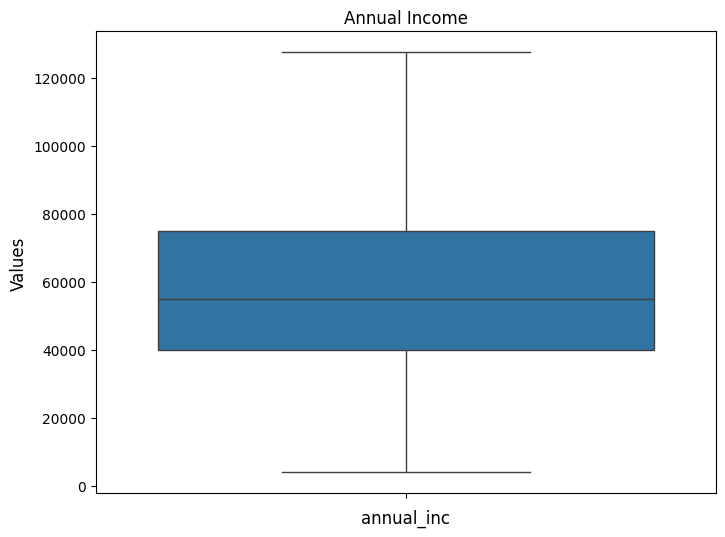


 
 

Most of the loan applicants earn between  40000.0  And  75000.0


In [90]:
# Calculate the lower bound and upper bound
income_stats = boxplotstats(df, 'annual_inc')
income_lb = income_stats['lower_bound']
income_ub = income_stats['upper_bound']
income_above_lb = df.annual_inc > income_lb
income_below_ub = df.annual_inc < income_ub

req_income = income_above_lb & income_below_ub

# Filter the rows with required annual income range between lower and upper bound
df = df[req_income]

# Show boxplot
boxplot(df, 'annual_inc', title='Annual Income')
print('\n \n \n')
print("Most of the loan applicants earn between ", df['annual_inc'].quantile(0.25), ' And ' , df['annual_inc'].quantile(0.75))

From this we can figure out that most loan applicants earn between 40,000 - 75,000 USD

> Add blockquote



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


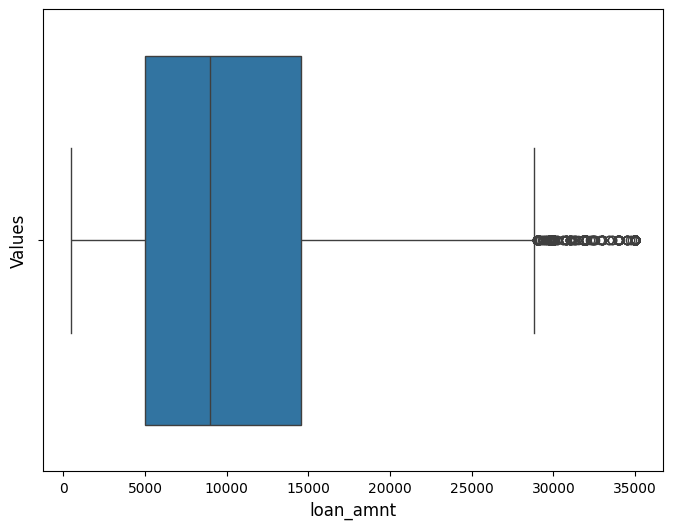


 
 

Most of the loan applicants took loan amount between  5000.0  And  14525.0


In [92]:
# for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
#     boxplot(df, col, horizontal=False)

# Box plot to find out most common loan amount among data set
boxplot(df, 'loan_amnt', horizontal=False)
print('\n \n \n')
print("Most of the loan applicants took loan amount between ", df['loan_amnt'].quantile(0.25), ' And ' , df['loan_amnt'].quantile(0.75))

Most of the loan applicants took loan amount between  5000.0  And  14525.0

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


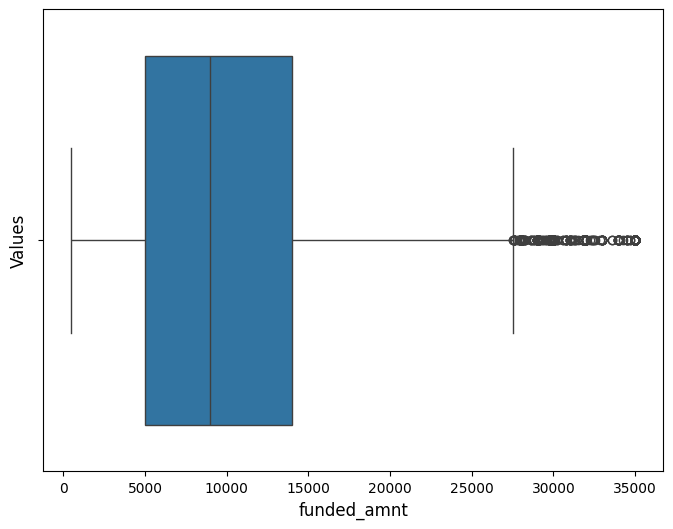


 
 

Most of the loan applicants were funded amount between  5000.0  And  14000.0


In [93]:
# Box plot to find out most common funded amnt among data set
boxplot(df, 'funded_amnt', horizontal=False)
print('\n \n \n')
print("Most of the loan applicants were funded amount between ", df['funded_amnt'].quantile(0.25), ' And ' , df['funded_amnt'].quantile(0.75))

Most of the loan applicants were funded amount between  5000.0  And  14000.0

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


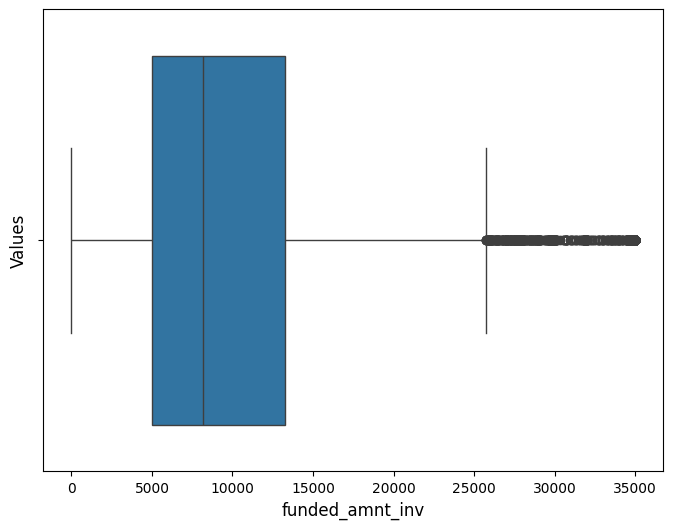


 
 

Most of the loan applicants have investor funded amount between  4975.0  And  13275.0


In [94]:
# Box plot to find out most common investors funded amnt among data set
boxplot(df, 'funded_amnt_inv', horizontal=False)
print('\n \n \n')
print("Most of the loan applicants have investor funded amount between ", df['funded_amnt_inv'].quantile(0.25), ' And ' , df['funded_amnt_inv'].quantile(0.75))

Most of the loan applicants have investor funded amount between  4975.0  And  13275.0

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


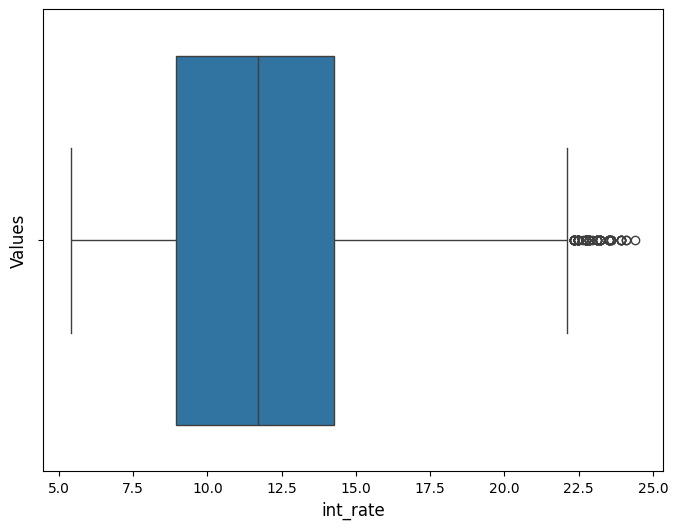


 
 

Most of the loan applicants were offered an intrest rate between  8.94  And  14.27


In [95]:
# Box plot to find out most common intrest rate offered among data set
boxplot(df, 'int_rate', horizontal=False)
print('\n \n \n')
print("Most of the loan applicants were offered an intrest rate between ", df['int_rate'].quantile(0.25), ' And ' , df['int_rate'].quantile(0.75))

Most of the loan applicants were offered an intrest rate between  8.94  And  14.27

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


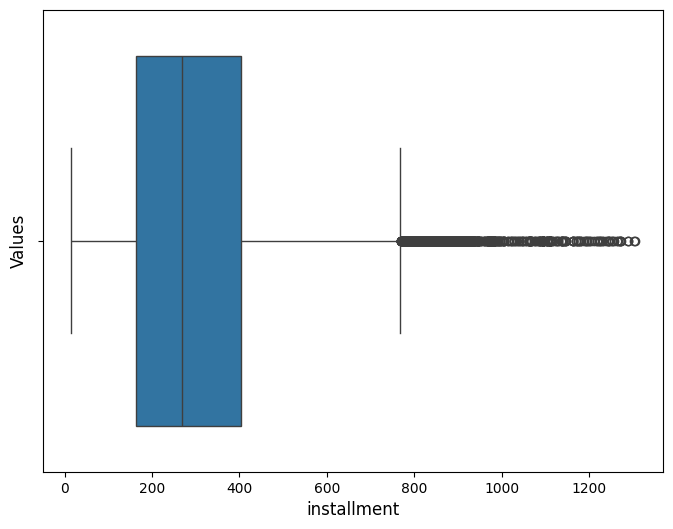


 
 

Most of the loan applicants installment amount is between  162.25  And  404.68


In [96]:
# Box plot to find out most common installment amount among data set
boxplot(df, 'installment', horizontal=False)
print('\n \n \n')
print("Most of the loan applicants installment amount is between ", df['installment'].quantile(0.25), ' And ' , df['installment'].quantile(0.75))

Most of the loan applicants installment amount is between  162.25 USD  And  404.68 USD

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


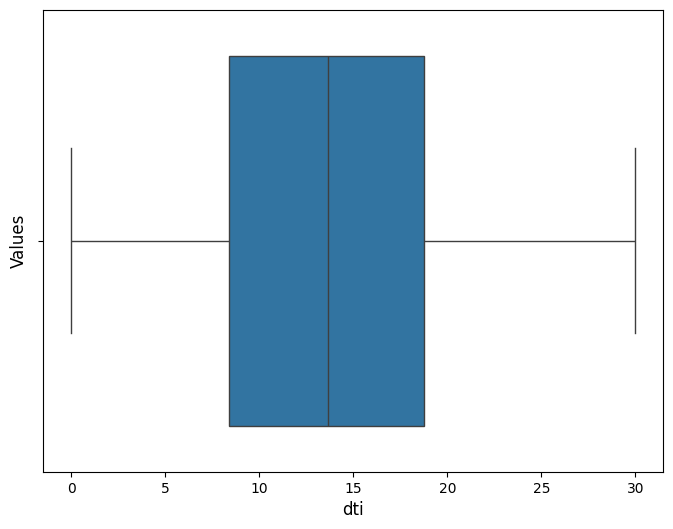


 
 

Most of the loan applicants have Debt to income ratio between  8.39  And  18.76


In [97]:
# Box plot to find out most Debt to Income  among data set
boxplot(df, 'dti', horizontal=False)
print('\n \n \n')
print("Most of the loan applicants have Debt to income ratio between ", df['dti'].quantile(0.25), ' And ' , df['dti'].quantile(0.75))

Most of the loan applicants have Debt to income ratio between  8.39  And  18.76

**Imputing values in Columns**

In [99]:
df.emp_length.isna().sum()


1011

In [106]:
# Impute missing values of empolyment length with most common value
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)

# Verify if the imputation of values is successful
df.emp_length.isna().sum()

In [109]:
# Convert Employement length to int
emp_length_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use the map function to replace values in the 'emp_length' column
df['emp_length'] = df['emp_length'].map(emp_length_mapping)

In [114]:
# See the values available for Home Ownership
df.home_ownership.value_counts()

df['home_ownership'].replace('NONE', 'OTHER', inplace = True)

# See the values available for Home Ownership
df.home_ownership.value_counts()


<ipython-input-114-7ab5912b1da9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['home_ownership'].replace('NONE', 'OTHER', inplace = True)


,count
home_ownership,
RENT,17844
MORTGAGE,15123
OWN,2812
OTHER,95


In [116]:
# List all the values of Income verification status
df.verification_status.value_counts()


,count
verification_status,
Not Verified,16080
Verified,10831
Source Verified,8963


In [118]:
# Replace Source Verified	 with Verified as both mean same
df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

<ipython-input-118-3338d17aa231>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['verification_status'].replace('Source Verified', 'Verified', inplace = True)


In [122]:
# Find out the list of public available bankrupticeis
df[df.pub_rec_bankruptcies.isna()]


,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
35006,NY,110000.0,7.07,0,15000.0,14875.00,A,MORTGAGE,476.58,8.94,2009-09-01,15000.0,Fully Paid,NaN,credit_card,A5,36,Not Verified
35058,TX,80800.0,14.97,3,3000.0,2988.24,C,MORTGAGE,102.92,14.26,2009-09-01,3000.0,Fully Paid,NaN,credit_card,C5,36,Not Verified
35362,MI,60000.0,11.08,0,4000.0,3892.26,B,MORTGAGE,131.22,11.14,2009-08-01,4000.0,Charged Off,NaN,car,B1,36,Not Verified
38443,NJ,37152.0,2.26,10,2300.0,589.61,D,RENT,77.69,13.17,2008-08-01,2300.0,Fully Paid,NaN,moving,D2,36,Verified
38717,OH,75000.0,16.08,0,6000.0,500.00,A,MORTGAGE,188.02,8.00,2008-05-01,6000.0,Fully Paid,NaN,other,A3,36,Not Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,CO,75000.0,15.55,5,5000.0,700.00,B,MORTGAGE,158.30,8.70,2007-07-01,5000.0,Fully Paid,NaN,credit_card,B1,36,Not Verified
39712,CO,110000.0,11.33,4,2500.0,1075.00,A,MORTGAGE,78.42,8.07,2007-07-01,2500.0,Fully Paid,NaN,home_improvement,A4,36,Not Verified
39713,NC,18000.0,6.40,3,8500.0,875.00,C,RENT,275.38,10.28,2007-07-01,8500.0,Fully Paid,NaN,credit_card,C1,36,Not Verified
39714,MA,100000.0,2.30,0,5000.0,1325.00,A,MORTGAGE,156.84,8.07,2007-07-01,5000.0,Fully Paid,NaN,debt_consolidation,A4,36,Not Verified


In [123]:
# See list of possible values of pub_rec_bankruptcies
df['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,33643
1.0,1575
2.0,5


In [125]:
# drop these as we cannot subsititue with random value for bankruptcy as this might be a strong factor in determining the loan approal status
df = df[df.pub_rec_bankruptcies.notna()]


In [126]:
# Check if there are any more null values
df.isna().sum()

,0
addr_state,0
annual_inc,0
dti,0
emp_length,0
funded_amnt,0
funded_amnt_inv,0
grade,0
home_ownership,0
installment,0
int_rate,0


# Data Analysis


**Derived Columns**

In [151]:
def bucket(column, thresholds, labels) -> str:
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]


In [136]:
# Extract Month & year info from Date
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year

In [152]:
# Map it to Quarter
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
df['issue_q'] = df['issue_m'].apply(bucket, args=(threshold_months, quarter_labels))

In [139]:
# Create new column loan_paid status with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"
loan_status_map = {'Charged Off': 'No', 'Fully Paid': 'Yes' }
df['loan_paid'] = df['loan_status'].map(loan_status_map)

In [153]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
df['loan_amnt_bucket'] = df['loan_amnt'].apply(bucket, args=(loan_amount_thresholds, loan_amount_labels))

In [154]:
# Categorising for int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
df['int_rate_bucket'] = df['int_rate'].apply(bucket, args=((int_rate_bins, int_rate_labels)))

In [155]:
df[['int_rate' , 'int_rate_bucket']]

,int_rate,int_rate_bucket
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
5,7.90,5%-9%
...,...,...
39562,10.28,9%-13%
39573,10.59,9%-13%
39623,12.49,9%-13%
39666,11.22,9%-13%


In [156]:
# Categorising Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
df['annual_inc_bucket'] = df['annual_inc'].apply(bucket, args=(annual_inc_thresholds, annual_inc_labels))

In [157]:
# Categorising Funded Amount
funded_amnt_thresholds = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
df['funded_amnt_bucket'] = df['funded_amnt'].apply(bucket, args=(funded_amnt_thresholds, funded_amnt_labels))

In [158]:
# Categorising DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['dti_bucket'] = df['dti'].apply(bucket, args=(dti_thresholds, dti_labels))

**Univariate Analysis**

Following fields will be checked as part of univariate analysis

1. Categorical variables
1. Ordered categorical data
    1. Grade (grade)
    2. Sub grade (sub_grade)
    3. Term (36 / 60 months) (term)
    4. Employment length (emp_length)
    5. Issue year (issue_y)
    6. Issue month (issue_m)
    7. Issue quarter (issue_q)

2. Unordered categorical data
    1. Address State (addr_state)
    2. Loan purpose (purpose)
    3. Home Ownership (home_ownership)
    4. Loan status (loan_status)
    5. Loan paid (loan_paid)
2. Quantitative variables
1. Interest rate bucket (int_rate_bucket)
2. Annual income bucket (annual_inc_bucket)
3. Loan amount bucket (loan_amnt_bucket)
4. Funded amount bucket (funded_amnt_bucket)
5. Debt to Income Ratio (DTI) bucket (dti_bucket)
6. Monthly Installment (installment)

**Categorical variables**

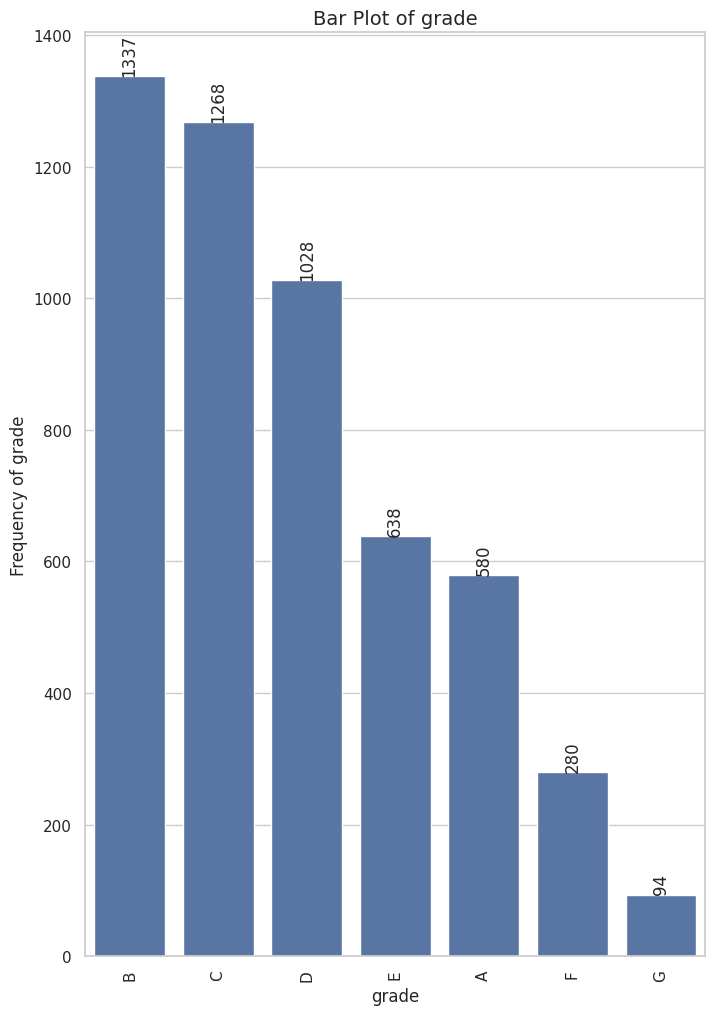

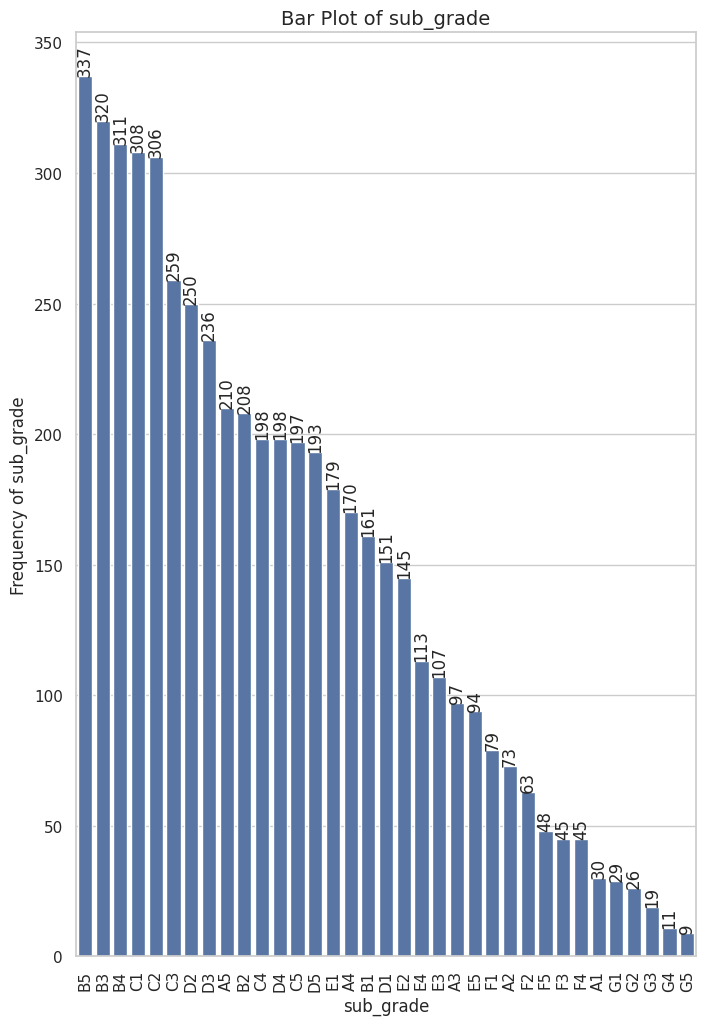

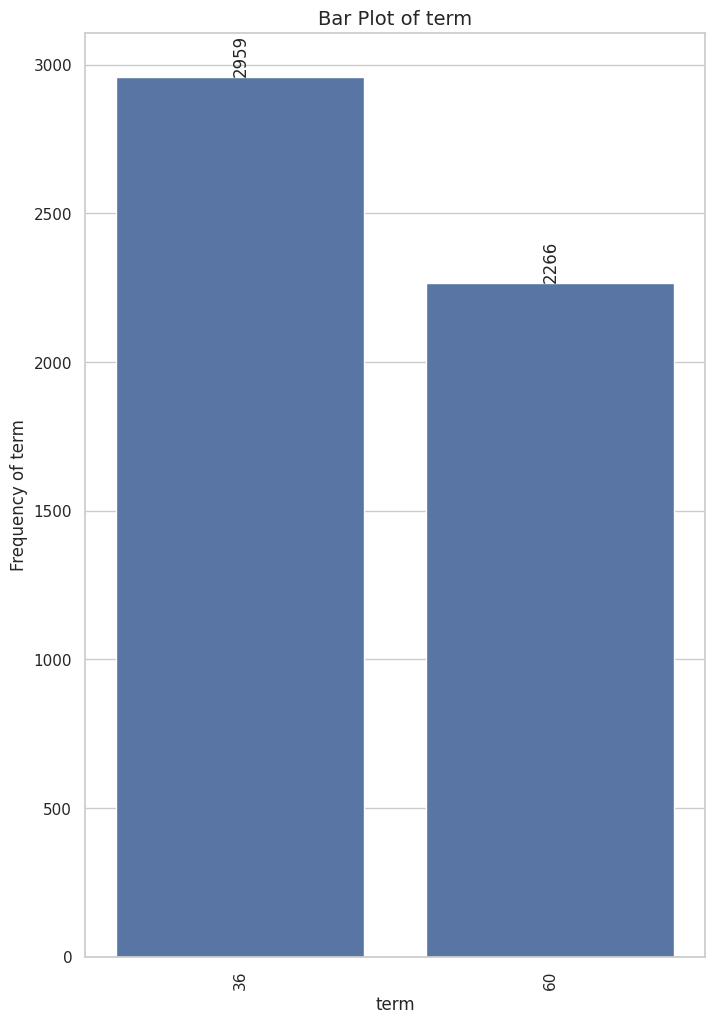

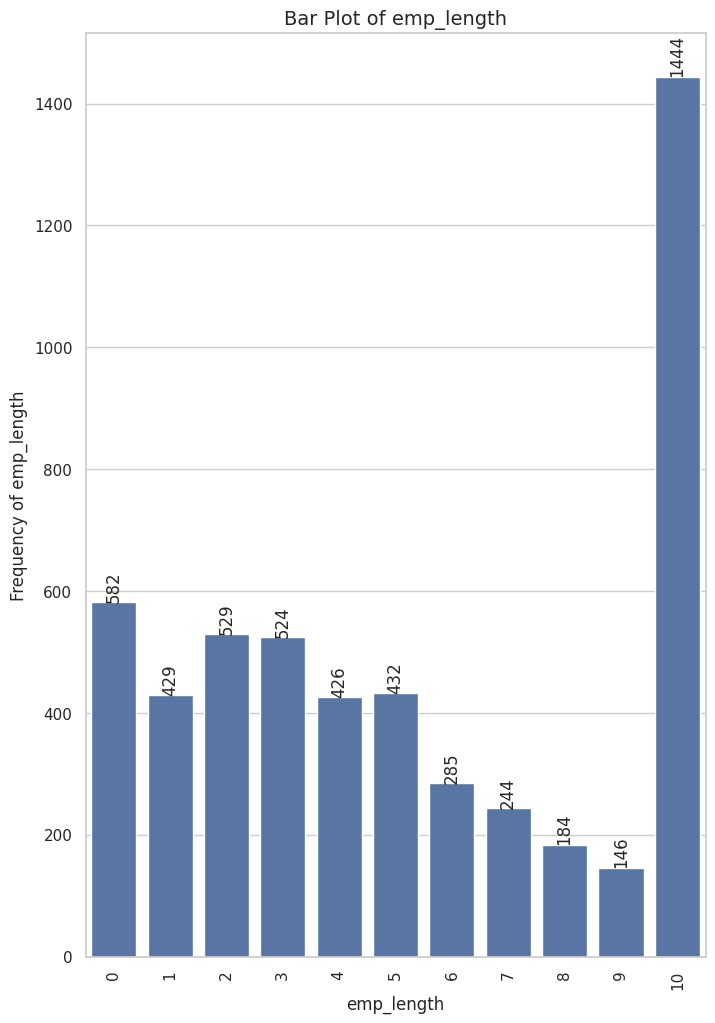

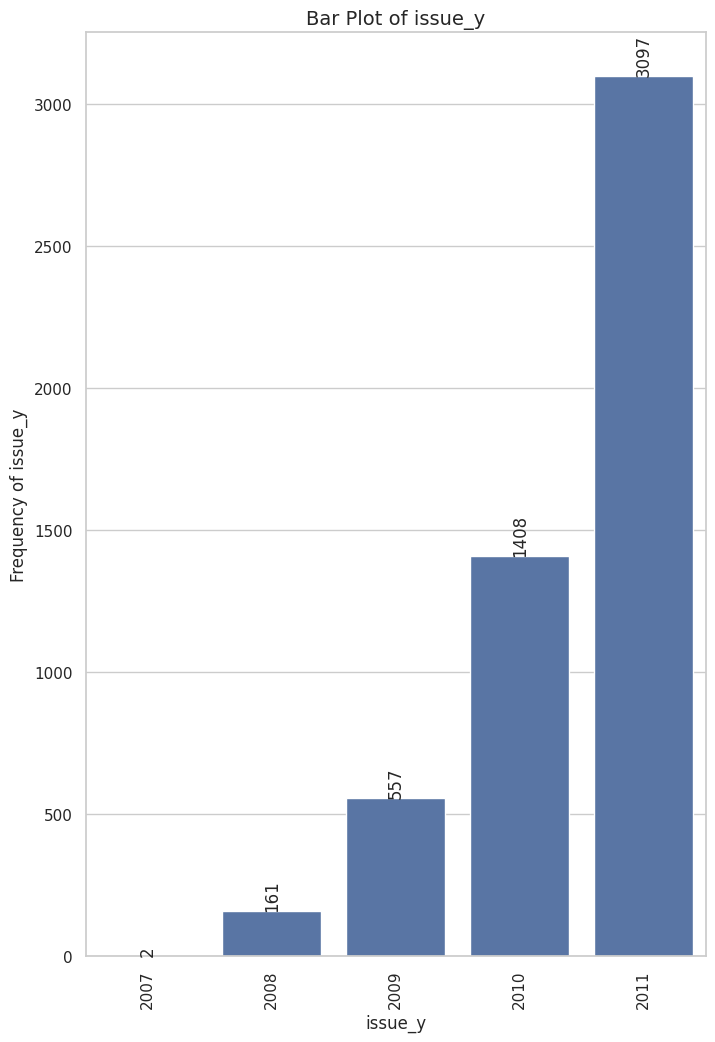

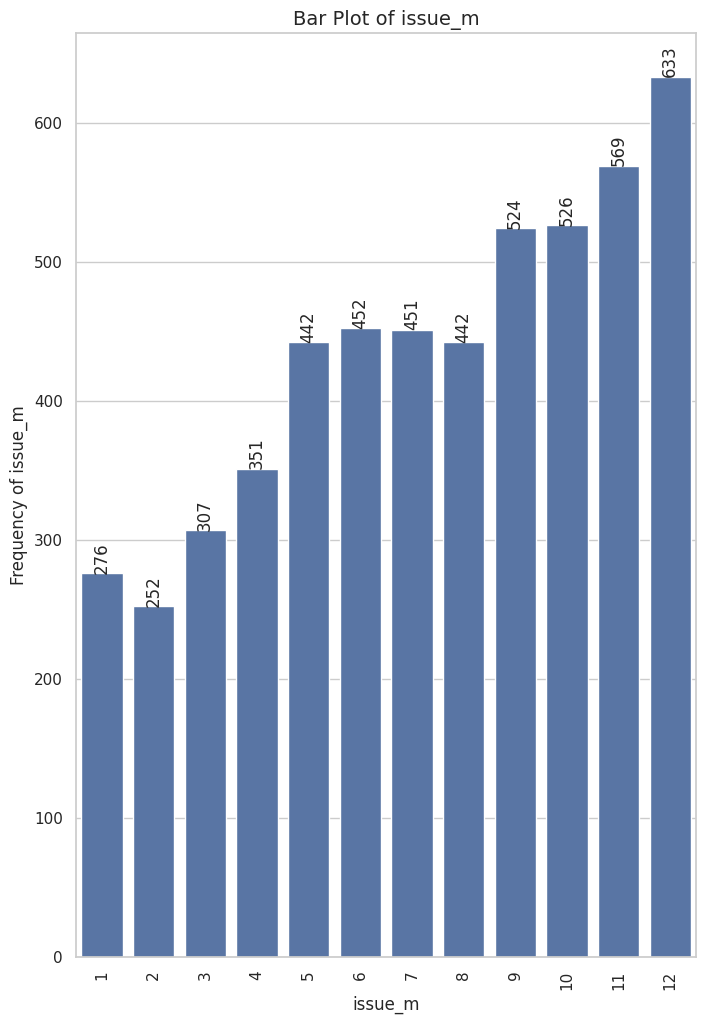

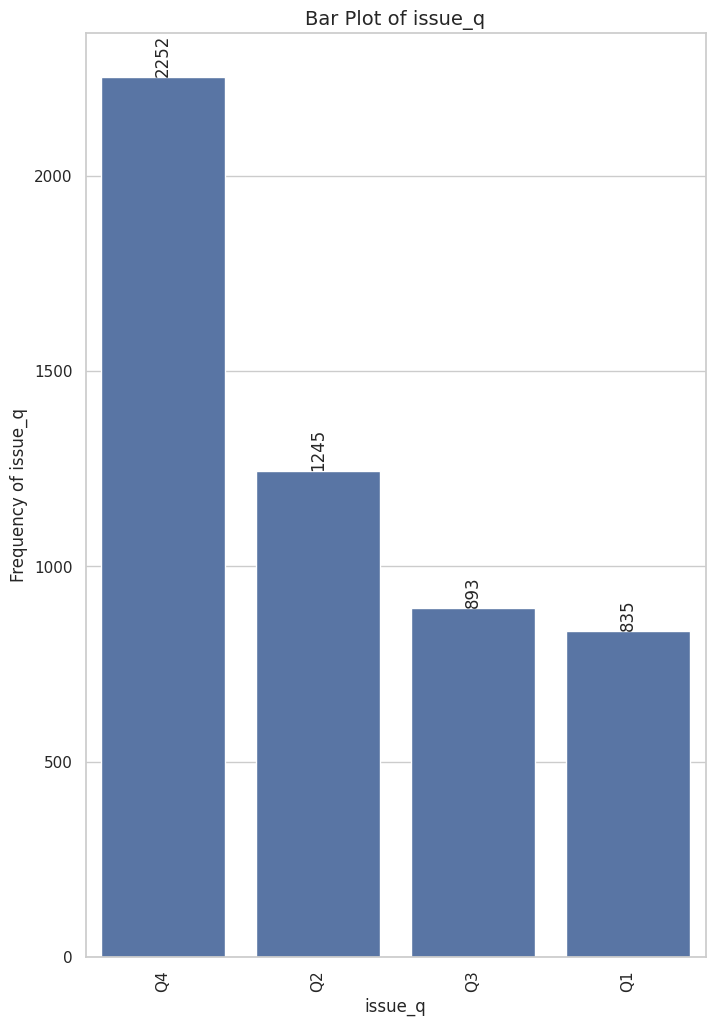

In [162]:
for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']:
    bar_graph(
        df,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

Unordered Categorical Variables

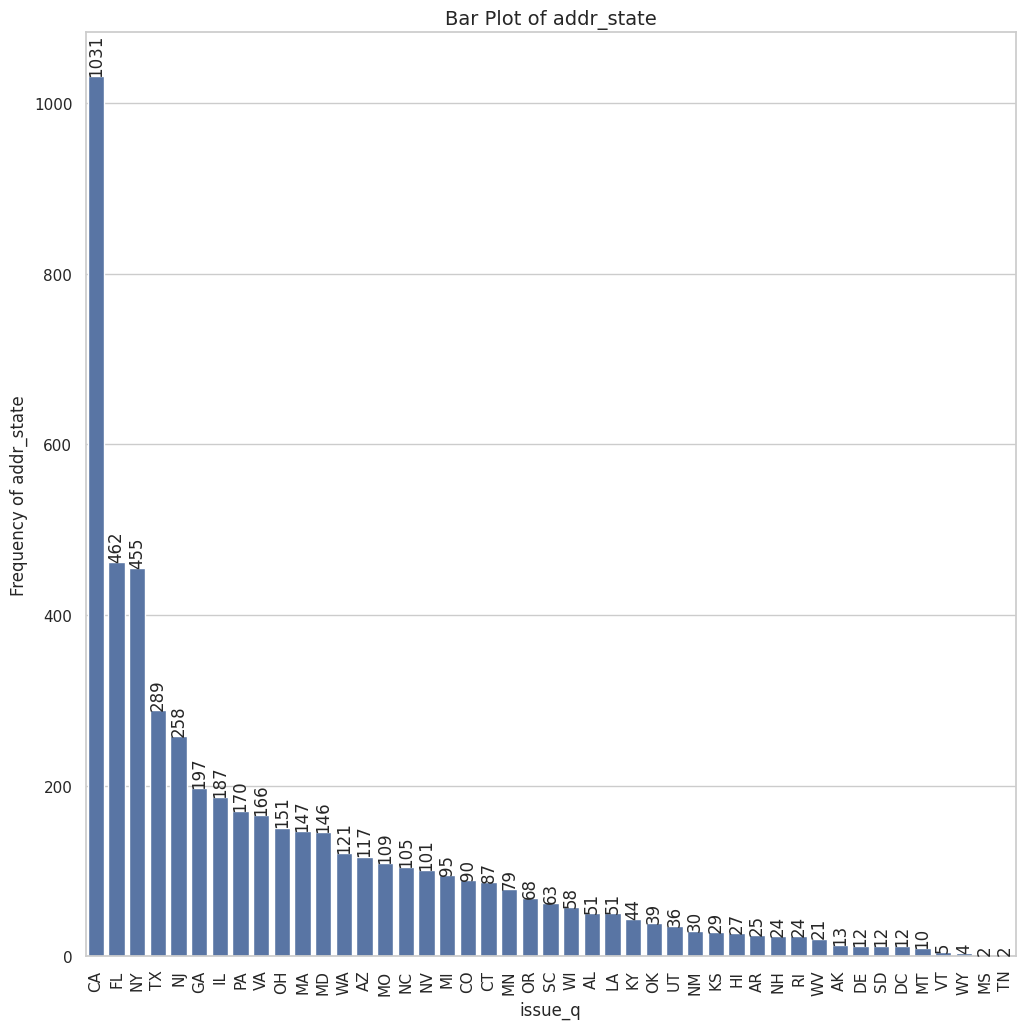

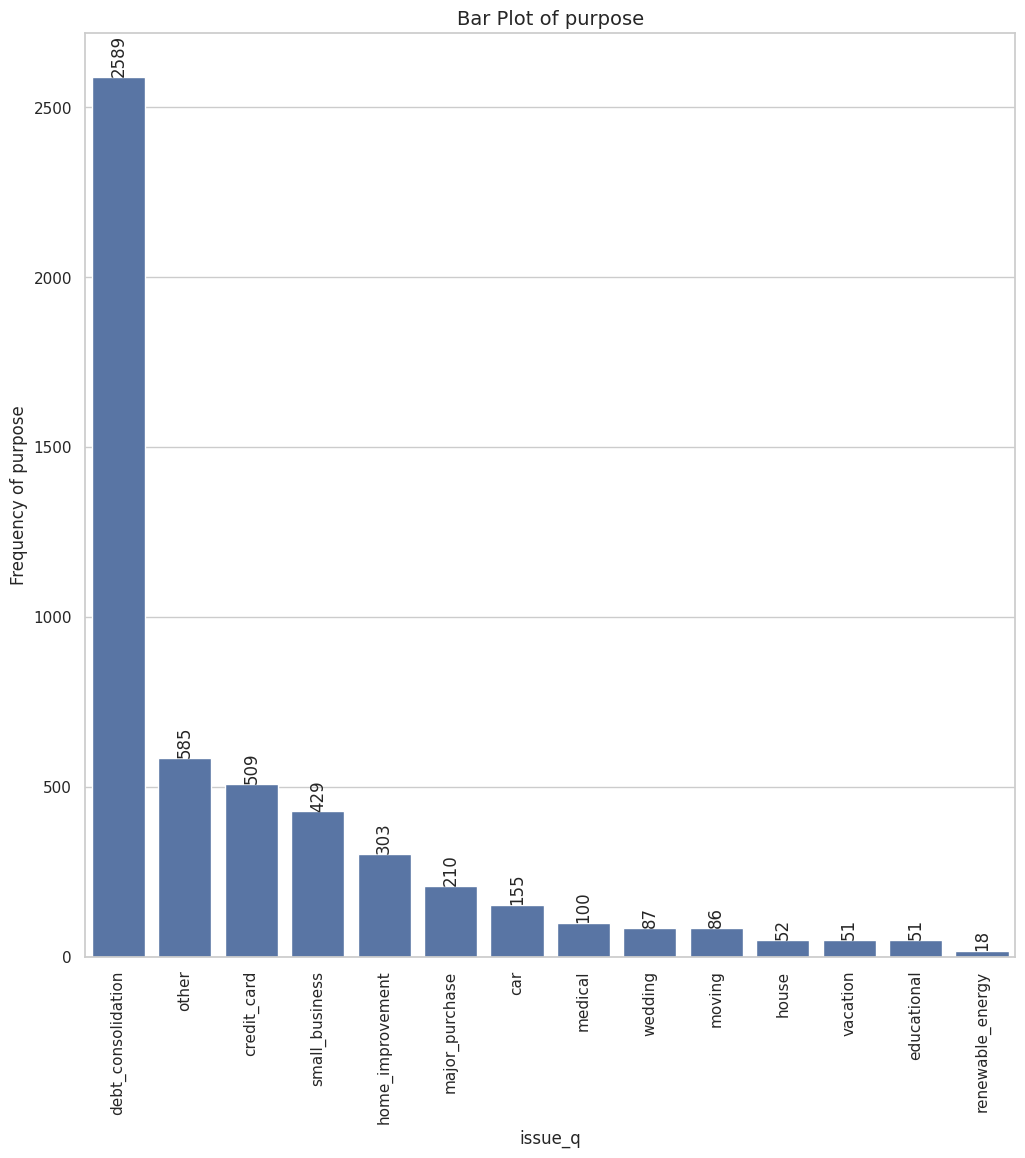

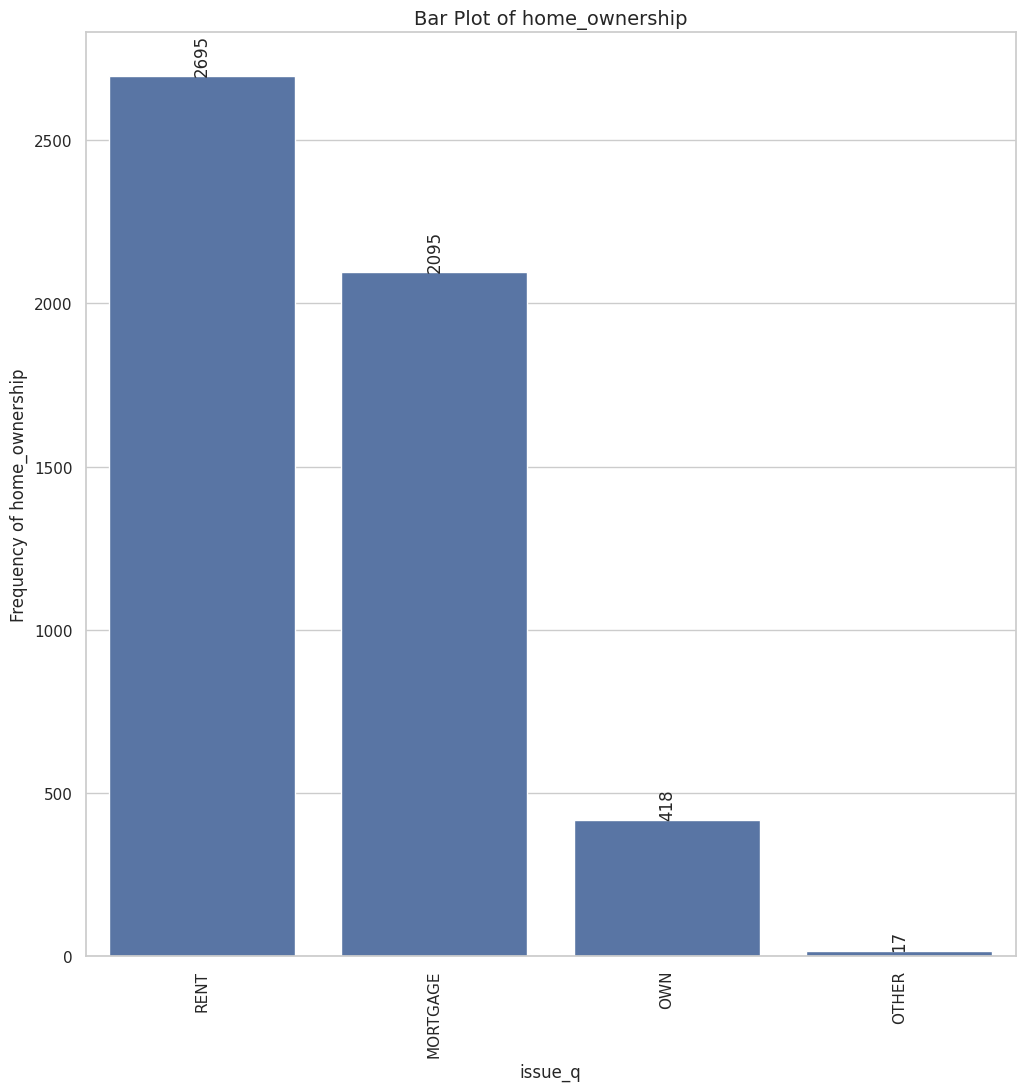

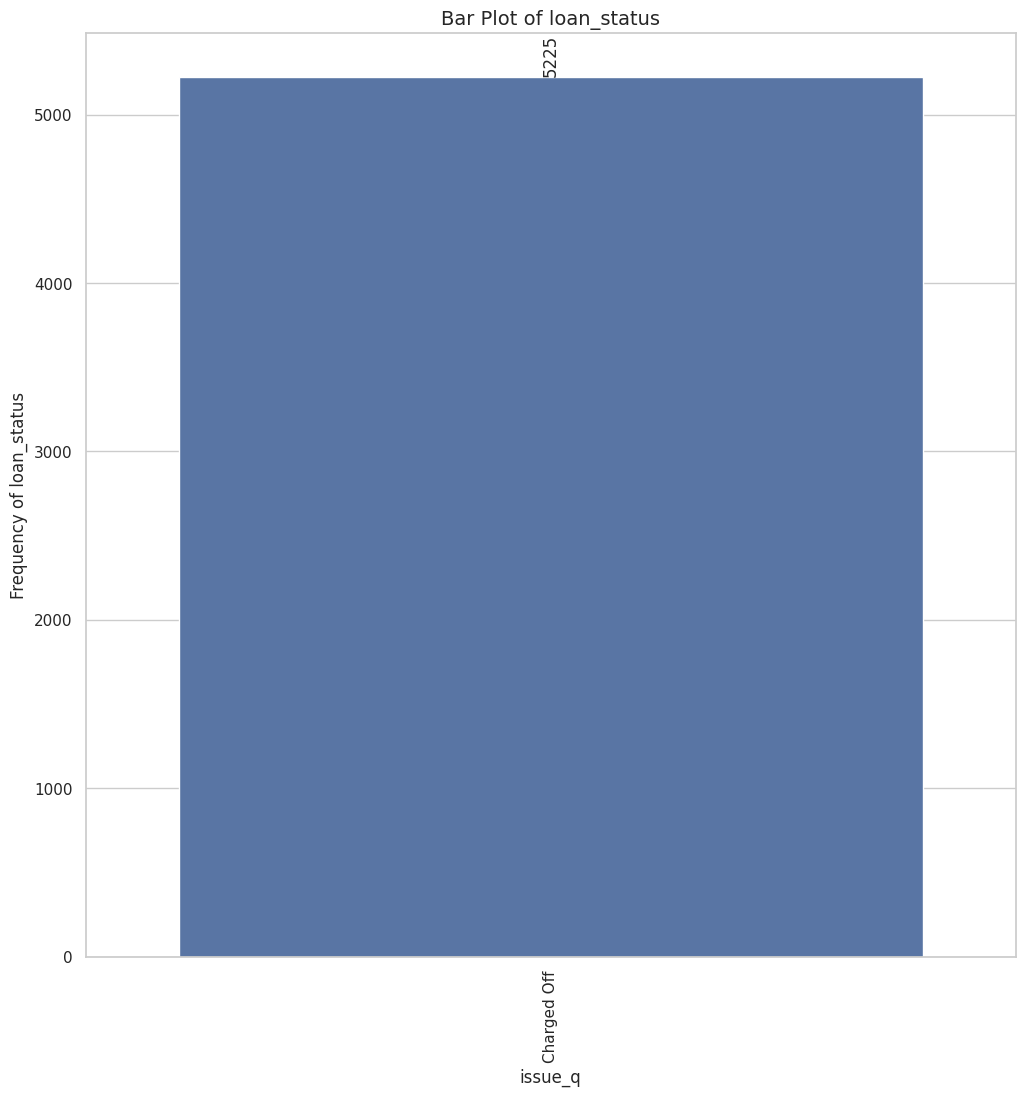

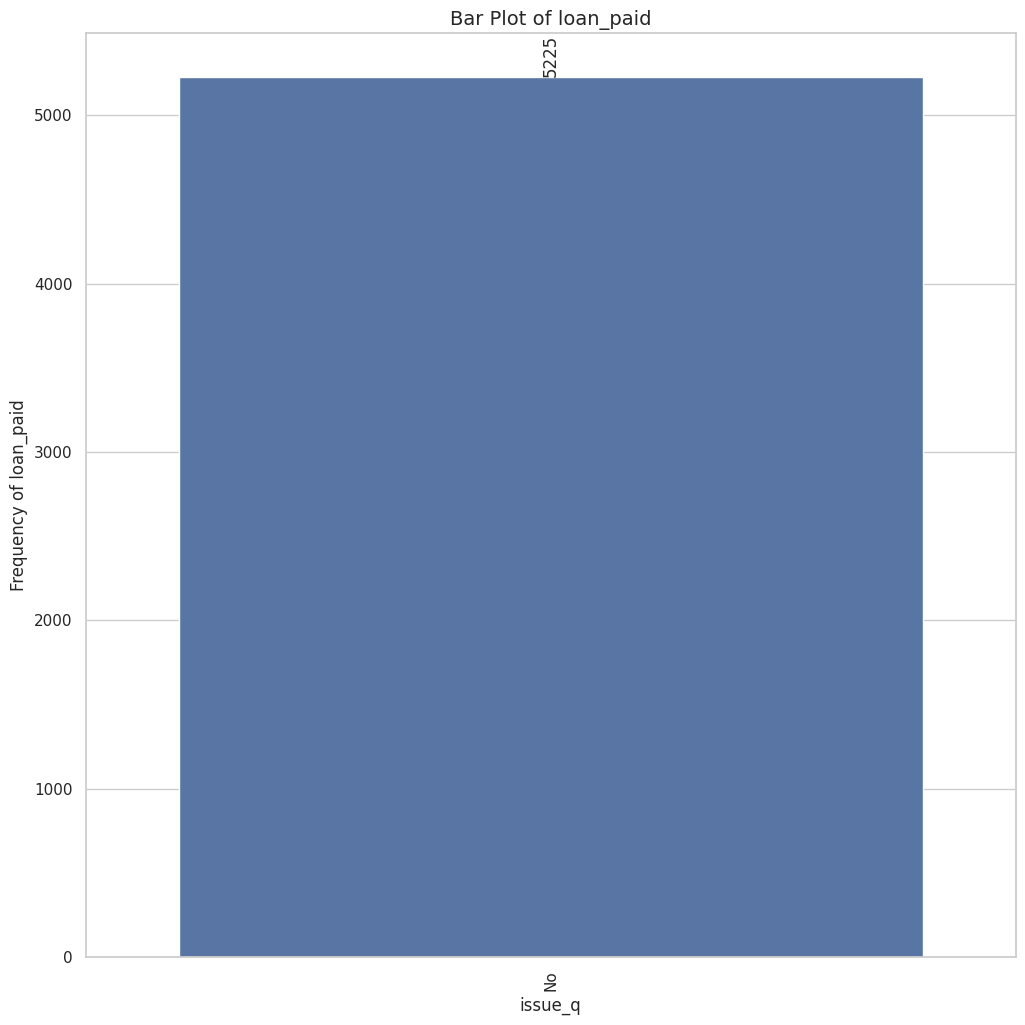

In [164]:
for un_cat_var in ['addr_state', 'purpose', 'home_ownership', 'loan_status', 'loan_paid']:
    bar_graph(
        df,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

**Quantitative variables**

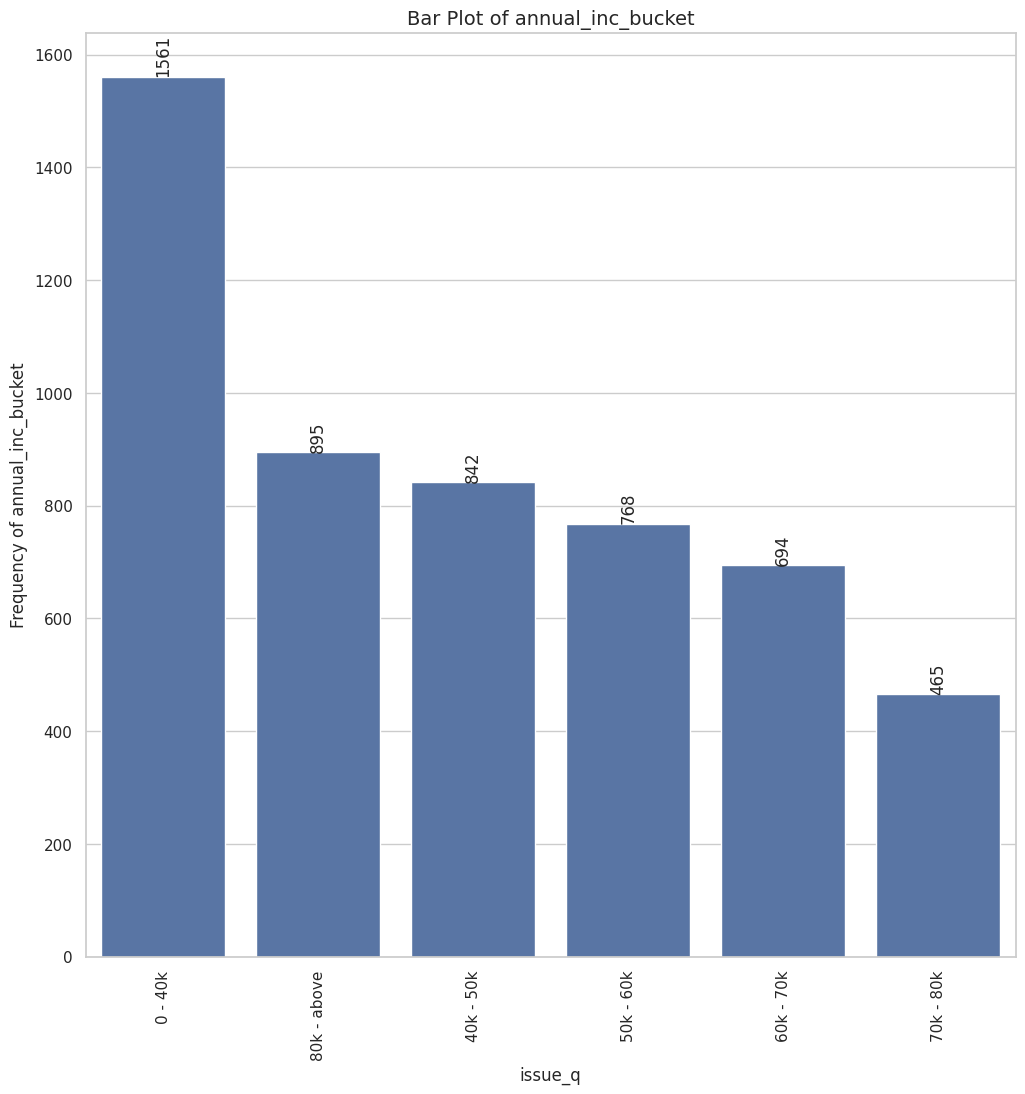

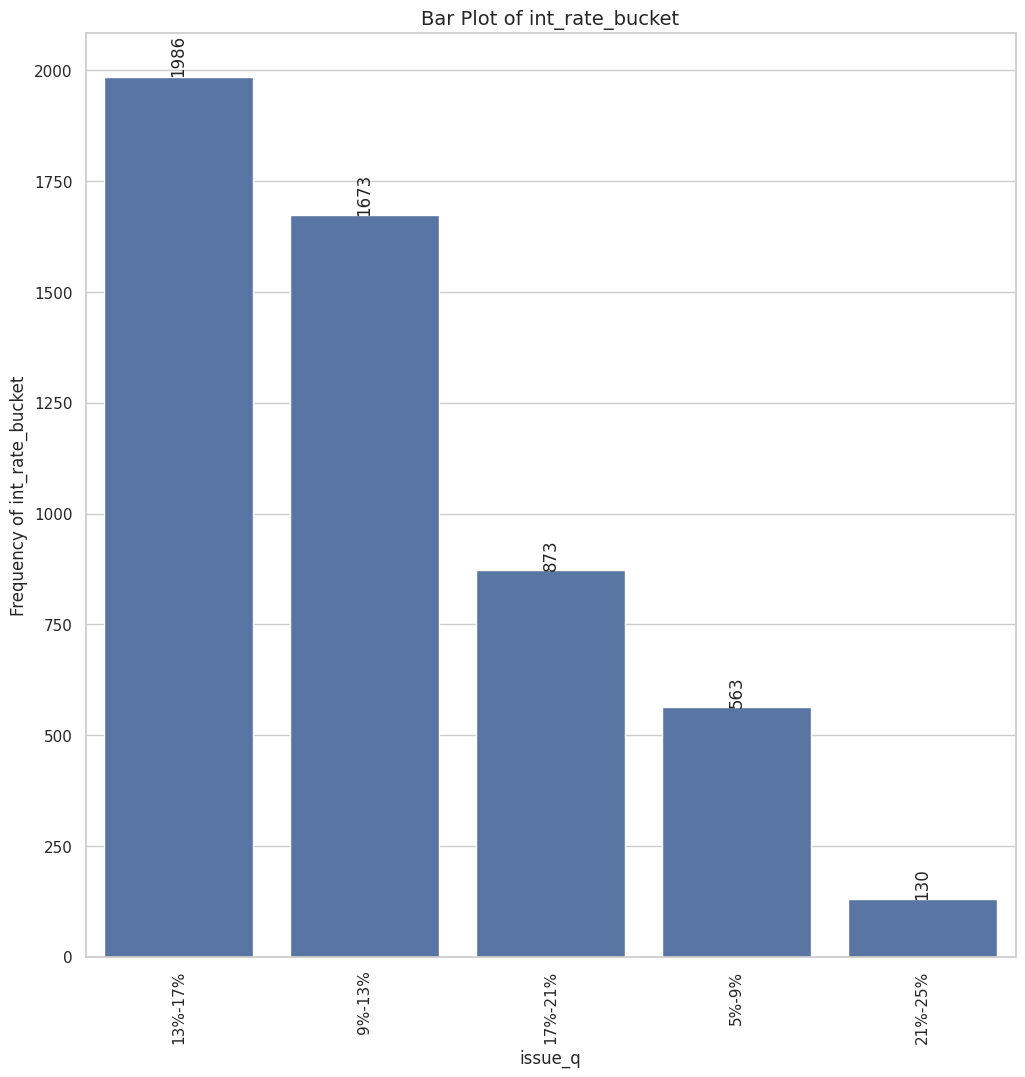

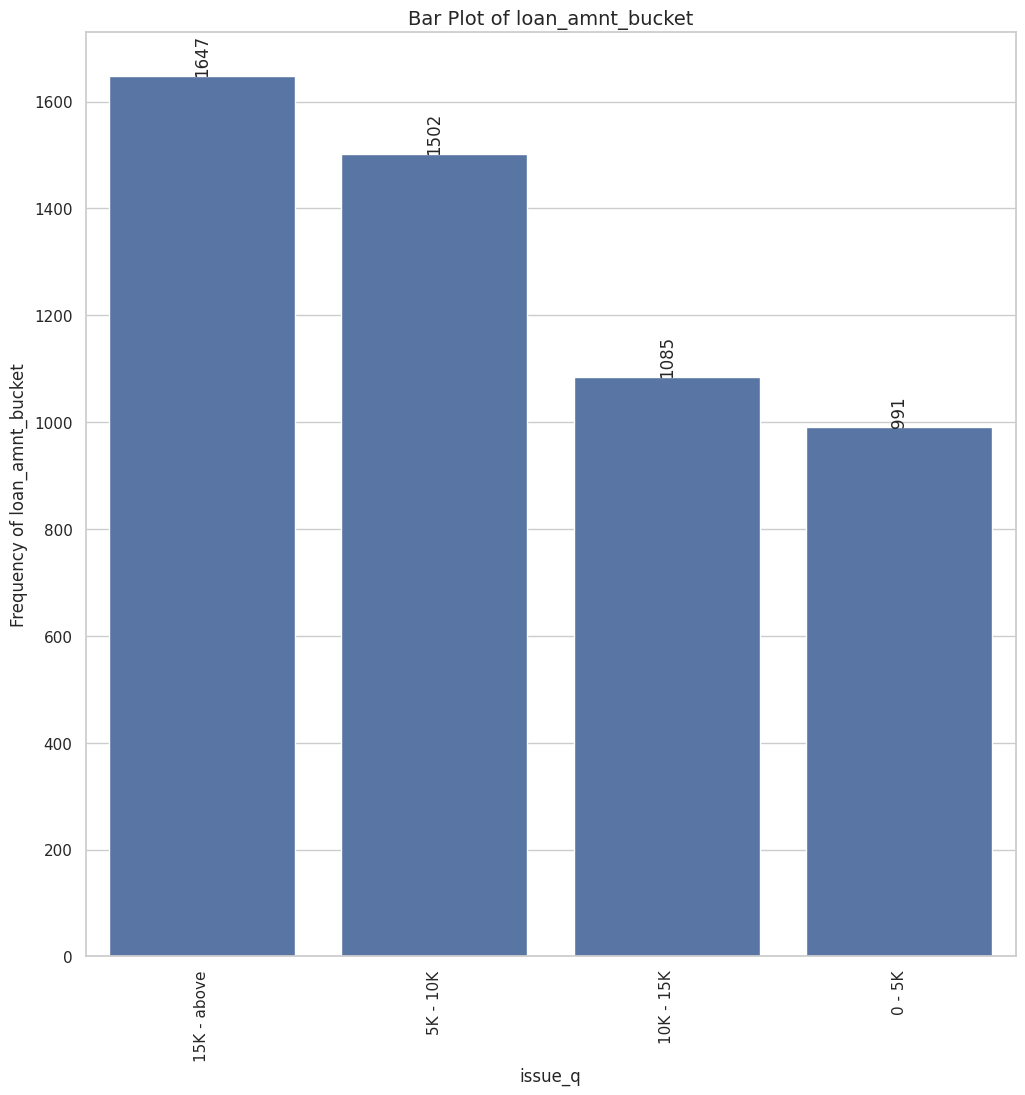

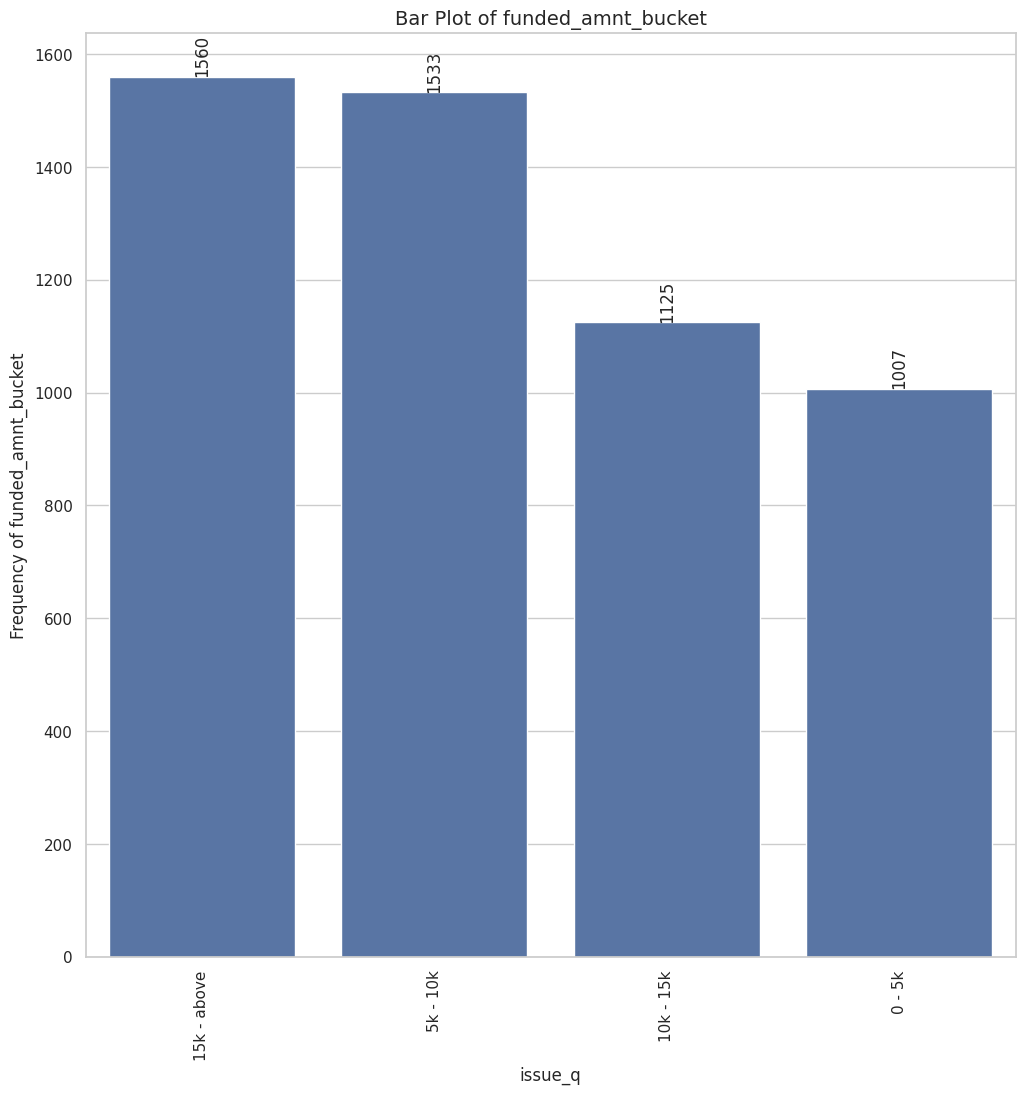

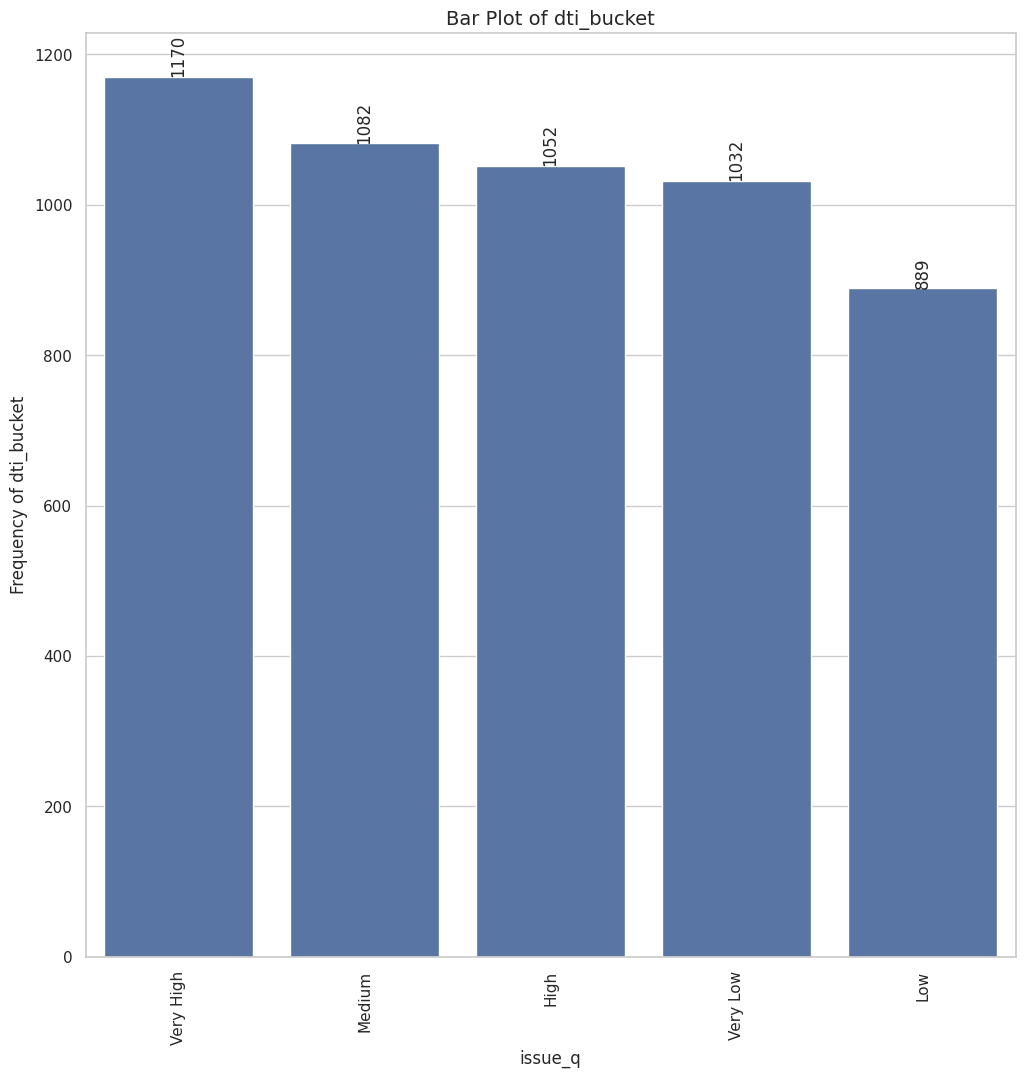

In [168]:
for quant_var in ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket']:
    bar_graph(
        df,
        x_column = quant_var,
        y_column = quant_var,
        title = f'Bar Plot of {quant_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {quant_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

In [165]:
installments_df = df[df.loan_paid == 'No']

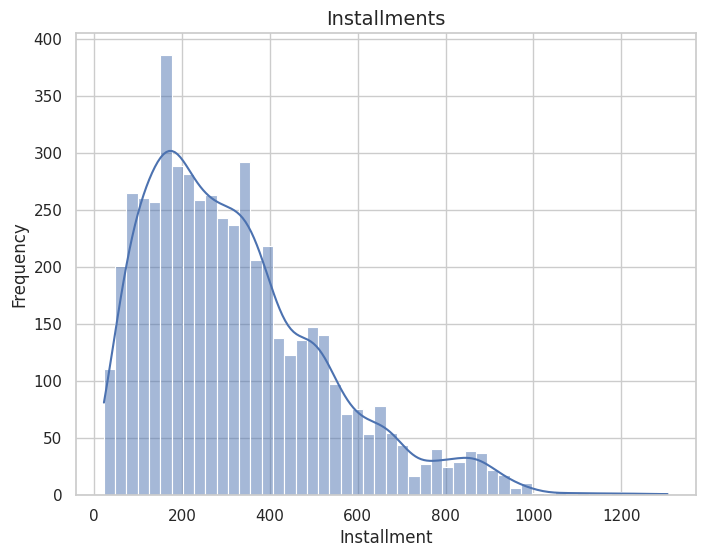

In [167]:
plot_histogram(installments_df, column='installment', bins=50, title='Installments', xlabel='Installment', ylabel='Frequency')

# **Observations and Inferences from Univariate Analysis**
**Ordered Categorical Variables**

*   Grade B had the highest number of "Charged off" loan applicants, with a total of 1,352 applicants, indicating that applicants with this credit grade faced challenges in repaying their loans.

*   Short-term loans with a duration of 36 months were the most popular among "Charged off" applicants, with 3,006 applications. This suggests that a significant portion of applicants who experienced loan default chose shorter repayment terms.

*   Applicants who had been employed for more than 10 years accounted for the highest number of "Charged off" loans, totaling 1,474. This indicates that long-term employment history did not necessarily guarantee successful loan repayment.

*   The year 2011 recorded the highest number of "Charged off" loan applications, totalling 3,152, signaling a positive trend in the number of applicants facing loan defaults over the years. This could be indicative of economic or financial challenges during that year.

*   "Charged off" loans were predominantly taken during the 4th quarter, with 2,284 applications, primarily in December. This peak in loan applications during the holiday season might suggest that financial pressures during the holidays contributed to loan defaults.


**Unordered Categorical Variables**

*   California had the highest number of "Charged off" loan applicants, with 1,055 applicants. For such applicants, the lending company needs to implement stricter eligibility criteria or credit assessments due to a higher number of "Charged off" applicants from this state.

*   Debt consolidation was the primary loan purpose for most "Charged off" loan applicants, with 2,633 applicants selecting this option. The lending company needs to exercise caution when approving loans for debt consolidation purposes, as it was the primary loan purpose for many "Charged off" applicants.

*   The majority of "Charged off" loan participants, totaling 2,715 individuals, lived in rented houses. The lending company must assess the financial stability of applicants living in rented houses, as they may be more susceptible to economic fluctuations
*   A significant number of loan participants, specifically 5,317 individuals, were loan defaulters, unable to clear their loans. The lending company should enhance risk assessment practices, including stricter credit checks and lower loan-to-value ratios, for applicants with a history of loan defaults. They should offer financial education and support services to help borrowers manage their finances and improve loan repayment outcomes.

**Quantitative variables**


*   1,561 loan applicants who charged off had annual salaries less than 40,000 USD. The lending company should exercise caution when lending to individuals with low annual salaries. They should implement rigorous income verification and assess repayment capacity more thoroughly for applicants in this income bracket.

*   Among loan participants who charged off (2,025), a considerable portion belonged to the interest rate bucket of 13%-17%. To reduce the risk of default, the lending company should consider offering loans at lower interest rates when possible.

*   1,695 loan participants who charged off received loan amounts of 15,000 USD and above. The lending company should evaluate applicants seeking higher loan amounts carefully. They should ensure the applicants must have a strong credit history and repayment capability to handle larger loans.

*   1,608 loan participants who charged off received funded amounts of 15,000 USD and above. The lending company should ensure that the funded amounts align with the borrower's financial capacity. They should conduct thorough credit assessments for larger loan requests.

*   Among loan participants who charged off, 1,178 loan applicants had very high debt-to-income ratios. The lending company should implement strict debt-to-income ratio requirements to prevent lending to individuals with unsustainable levels of debt relative to their income.

*   Among loan participants who charged off, it's observed that the majority of them had monthly installment amounts falling within the range of 160-440 USD. The lending company should closely monitor and assess applicants with similar installment amounts to mitigate the risk of loan defaults.



# Bivariate Analysis

Following fields will be analysed as part of bivariate analysis against Loan Status (loan_status) column

1. Categorical variables
1. Ordered categorical data
    1. Grade (grade)
    2. Sub grade (sub_grade)
    3. Term (36 / 60 months) (term)
    4. Employment length (emp_length)
    5. Issue year (issue_y)
    6. Issue month (issue_m)
    7. Issue quarter (issue_q)

2. Unordered categorical data
    1. Loan purpose (purpose)
    2. Home Ownership (home_ownership)
    3. Verification Status (verification_status)
    4. Address State (addr_state)
    
2. Quantitative variables
1. Int Rate Bucket (int_rate_bucket)
2. Debt to Income Bucket (dti_bucket)
3. Annual Income Bucket (annual_inc_bucket)
4. Funded Amount Bucket (funded_amnt_bucket)
5. Loan Amount Bucket (loan_amnt_bucket)

**Bivariate Analysis of Ordered Categorical Variables**

**Grade vs. Loan Status**

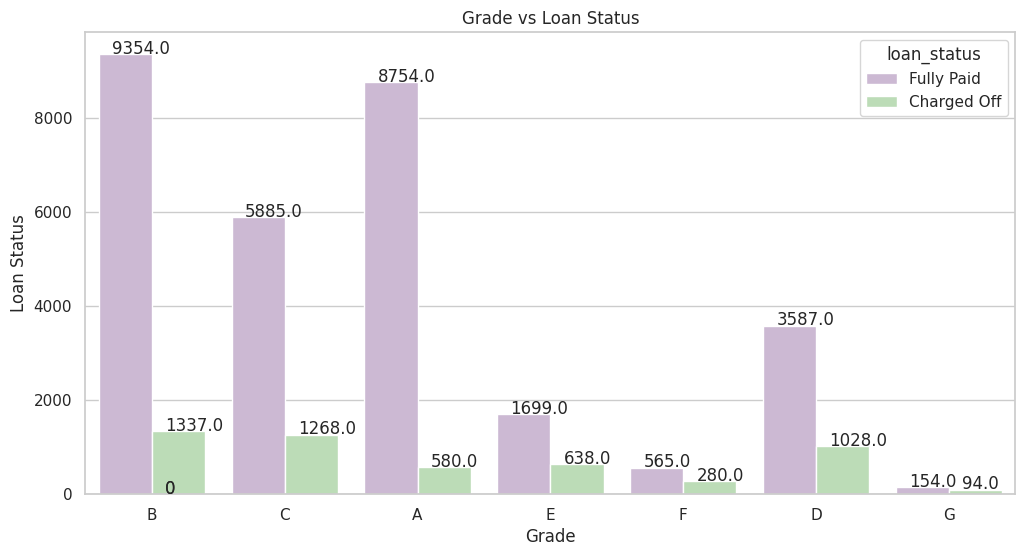

In [170]:
countplot_graph({
    'data':df,
    'x': 'grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Grade',
    'ylabel': 'Loan Status',
    'title': 'Grade vs Loan Status',
    'palette': 'PRGn'
})

The loan applicants belonging to Grades B, C and D contribute to most number of "Charged Off" loans


**Sub Grade vs. Loan Status**

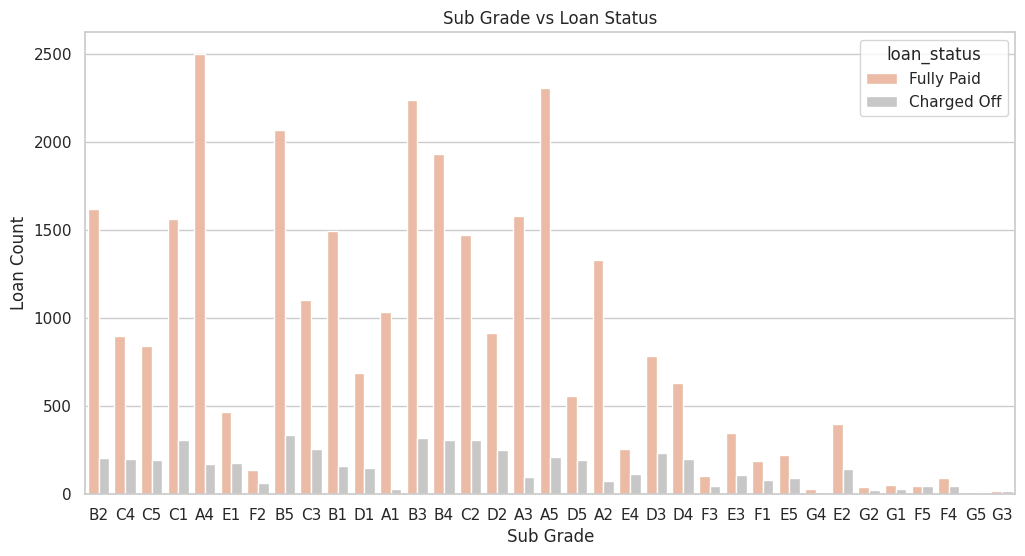

In [172]:
countplot_graph({
    'data': df,
    'x': 'sub_grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Sub Grade',
    'ylabel': 'Loan Count',
    'title': 'Sub Grade vs Loan Status',
    'palette': 'RdGy'
}, annot = False)

Loan applicants belonging to Sub Grades B3, B4, and B5 are likely to Charge off


**Term vs. Loan Status**

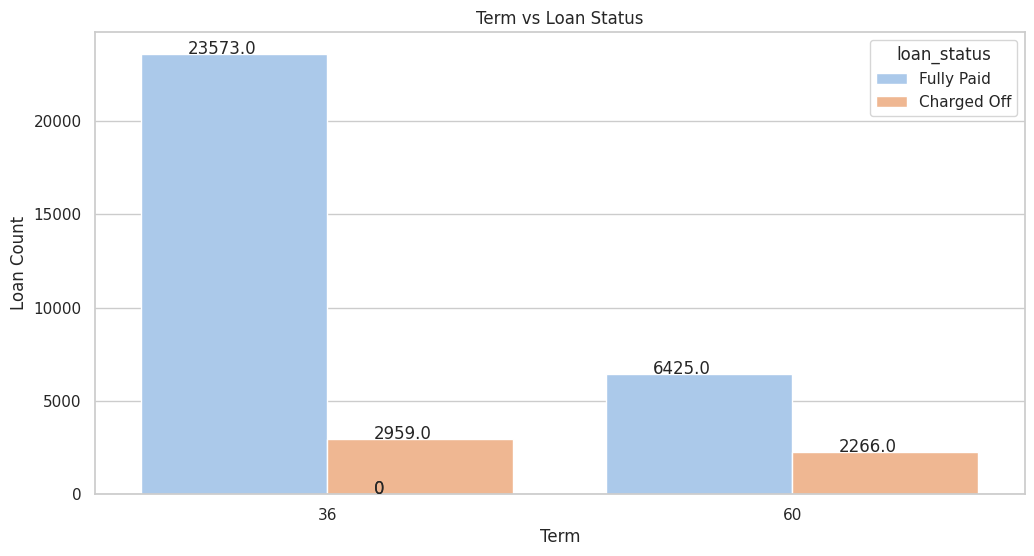

In [174]:
countplot_graph({
    'data': df,
    'x': 'term',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Term',
    'ylabel': 'Loan Count',
    'title': 'Term vs Loan Status',
    'palette': 'pastel'
})

In [177]:
def charged_off_percent(df, column, duration):
    charged_off = df[(df[column] == duration) & (df['loan_status'] == 'Charged Off')][column].value_counts()[duration]
    total = df[df[column] == duration][column].value_counts()[duration]
    return round((charged_off / total) * 100, 2)

In [178]:
charged_off_percent_36_m = charged_off_percent(df, 'term', 36)
charged_off_percent_60_m = charged_off_percent(df, 'term', 60)
print(f'Charged off pecentage for people taking loan for 60 months - {charged_off_percent_60_m}%')
print(f'Charged off pecentage for people taking loan for 36 months - {charged_off_percent_36_m}%')

Charged off pecentage for people taking loan for 60 months - 26.07%
Charged off pecentage for people taking loan for 36 months - 11.15%


Loan applicants applying loan for 60 months are likely to default more than the one taking loan for 36 months


**Employment Length vs. Loan Status**

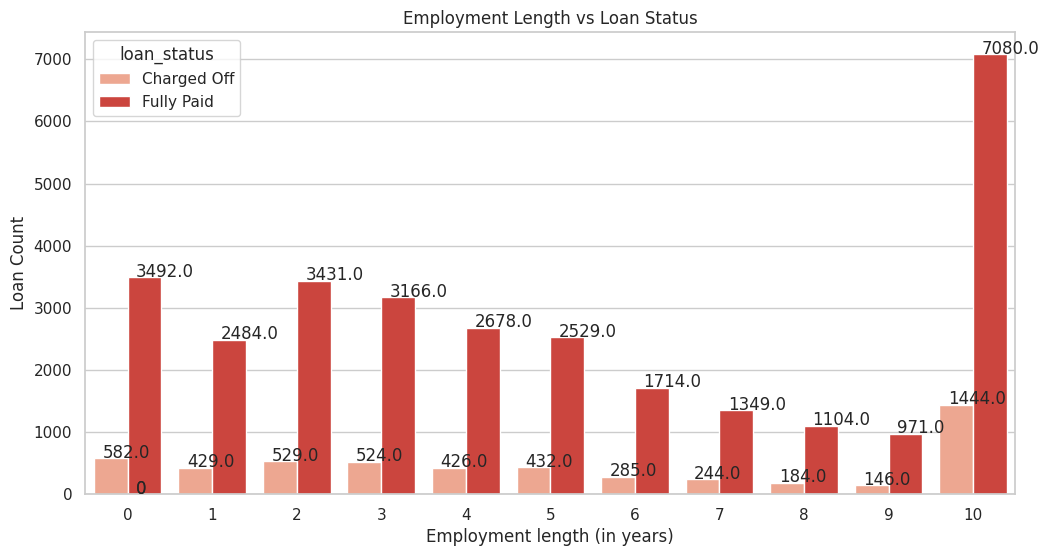

In [179]:
countplot_graph({
    'data': df,
    'x': 'emp_length',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Employment length (in years)',
    'ylabel': 'Loan Count',
    'title': 'Employment Length vs Loan Status',
    'palette': "Reds"
})

Most number of loan applicants are 10 or more years of experience. They also are the ones who are most likely to default


**Loan Year vs. Loan Status**

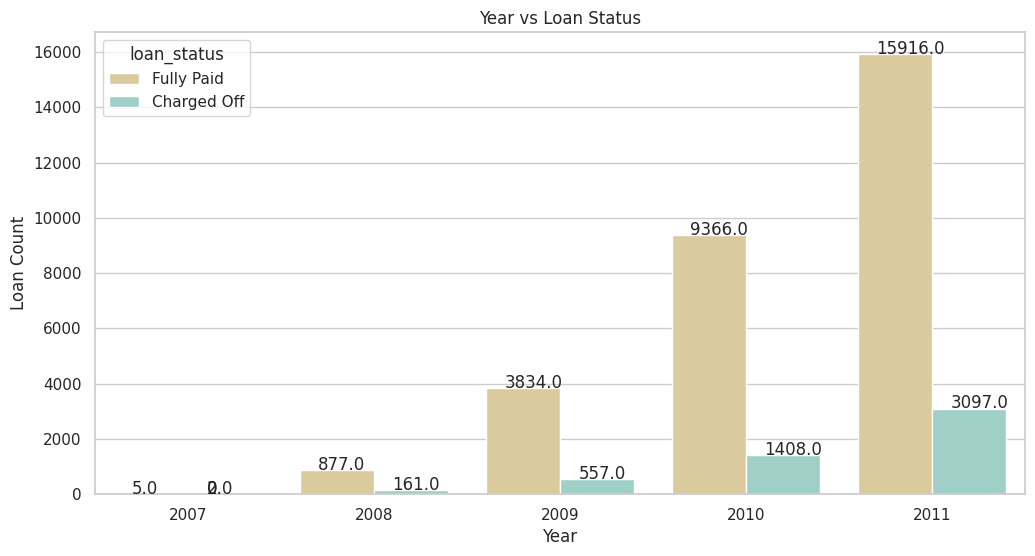

In [181]:
countplot_graph({
    'data': df,
    'x': 'issue_y',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Year',
    'ylabel': 'Loan Count',
    'title': 'Year vs Loan Status',
    'palette': "BrBG"
})

The loan applicants have increased steadily from 2007 to 2011 showcasing positive trend in the upcoming years.


**Loan Month vs. Loan Status**

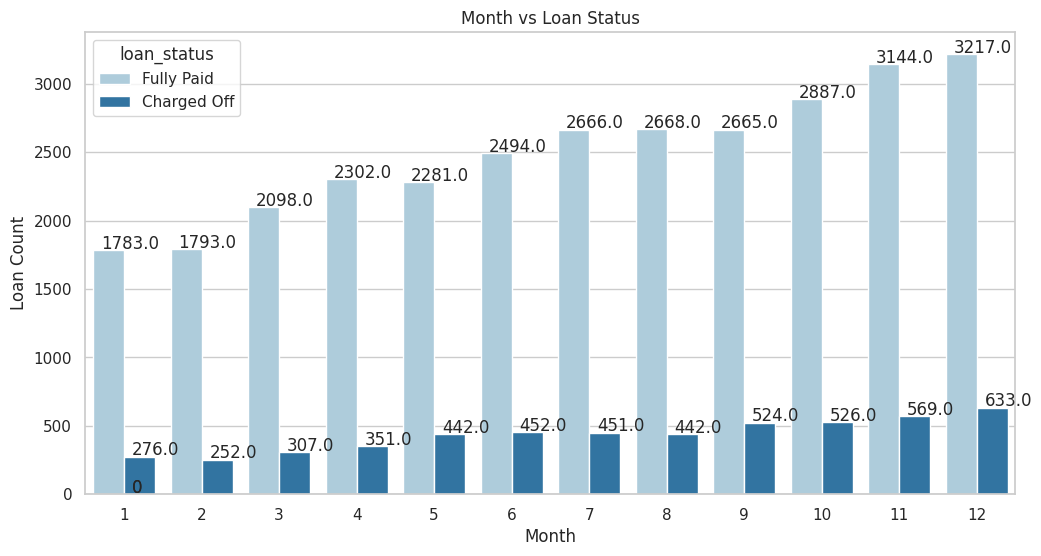

In [182]:
countplot_graph({
    'data': df,
    'x': 'issue_m',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Month',
    'ylabel': 'Loan Count',
    'title': 'Month vs Loan Status',
    'palette': "Paired"
})

The month of December is the most preferred month of taking loans. This may be due to the holiday season.


**Loan Quarter vs. Loan Status**


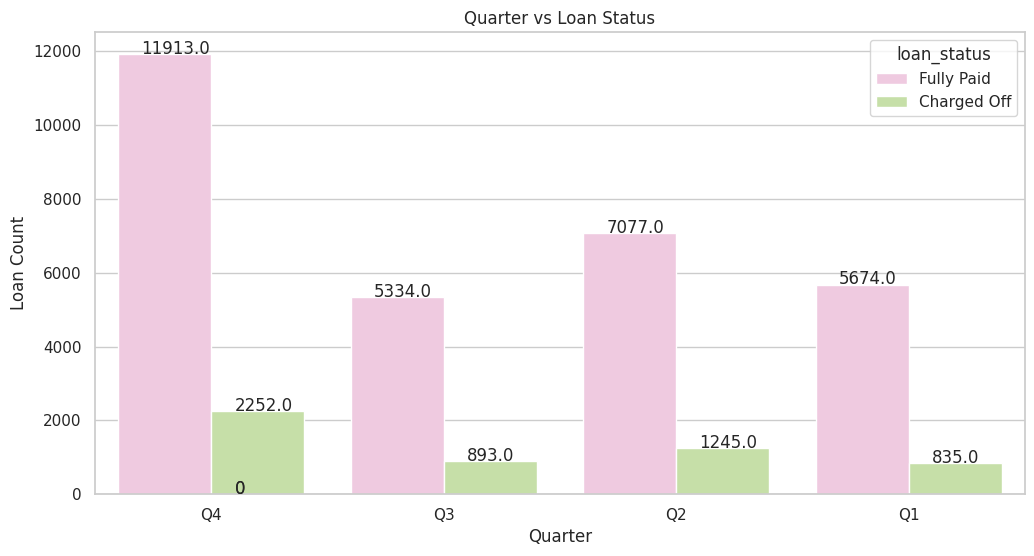

In [183]:
countplot_graph({
    'data': df,
    'x': 'issue_q',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Quarter',
    'ylabel': 'Loan Count',
    'title': 'Quarter vs Loan Status',
    'palette': "PiYG"
})

**Bivariate Analysis of Unordered Categorical Variables**

Purpose vs. Loan Status

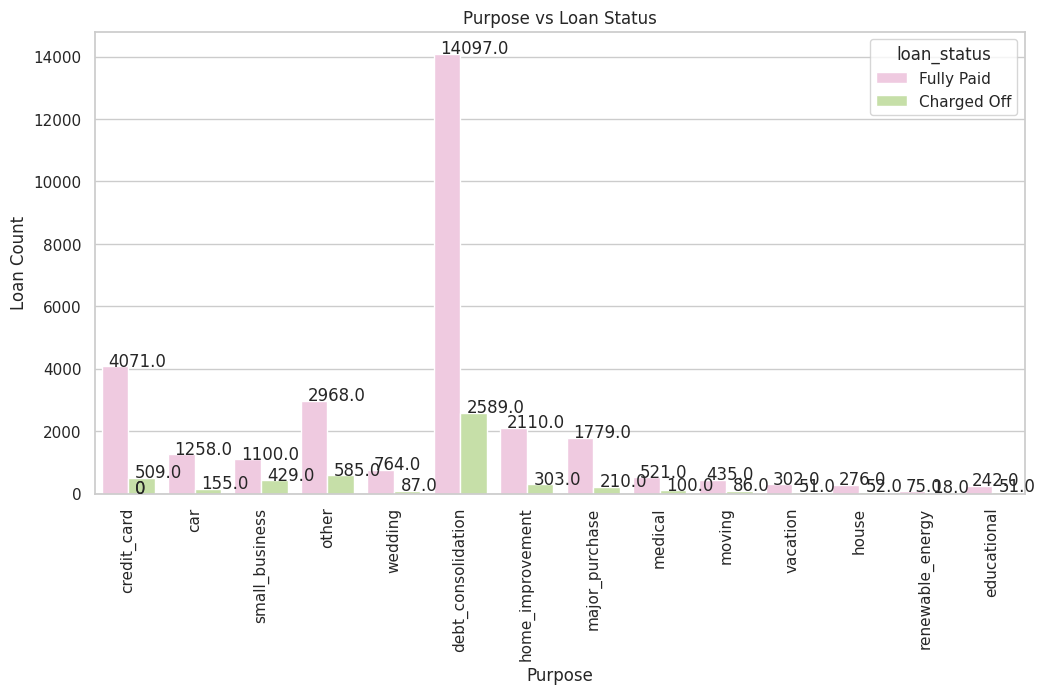

In [184]:
countplot_graph({
    'data': df,
    'x': 'purpose',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Purpose',
    'ylabel': 'Loan Count',
    'title': 'Purpose vs Loan Status',
    'palette': "PiYG",
    'x_tick_rotation': 90
})

Home Ownership vs. Loan Status

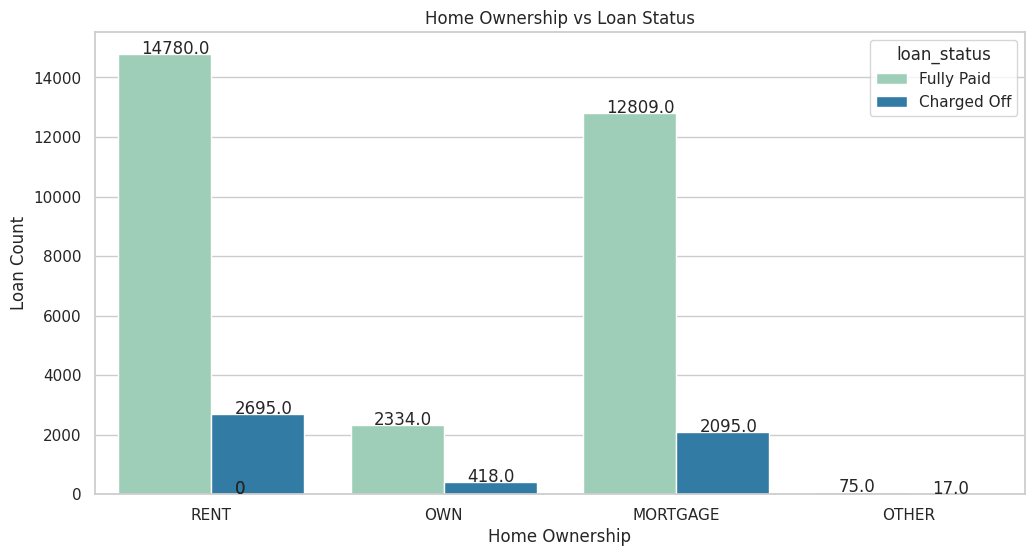

In [186]:
countplot_graph({
    'data': df,
    'x': 'home_ownership',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Home Ownership',
    'ylabel': 'Loan Count',
    'title': 'Home Ownership vs Loan Status',
    'palette': "YlGnBu"
})

The loan applicants who live in a rented or mortgaged house are more likely to default


Verification Status vs. Loan Status

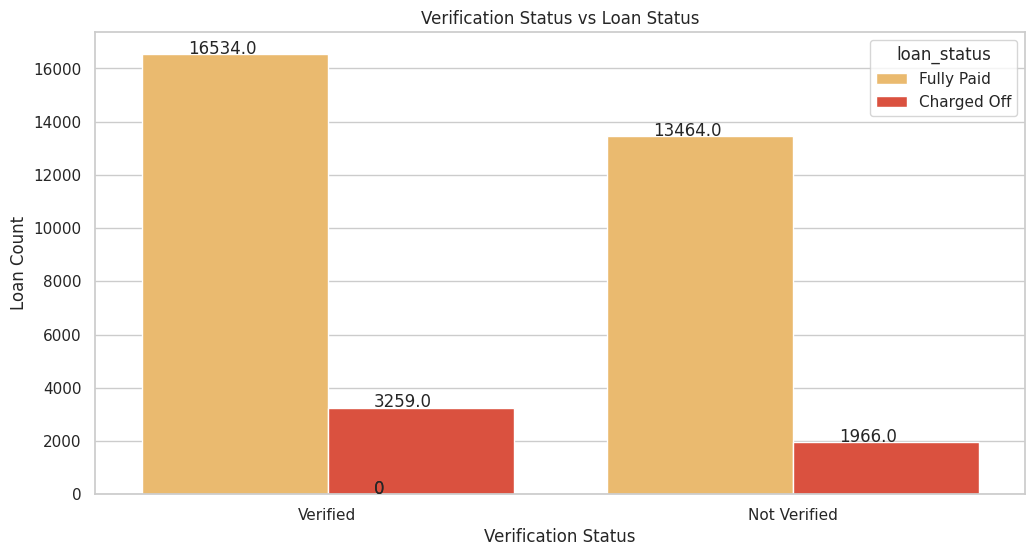

In [187]:
countplot_graph({
    'data': df,
    'x': 'verification_status',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Verification Status',
    'ylabel': 'Loan Count',
    'title': 'Verification Status vs Loan Status',
    'palette': "YlOrRd"
})

The loan applicants who have been verified are defaulting more than the applicants who are not verified


**Address State vs. Loan Status**

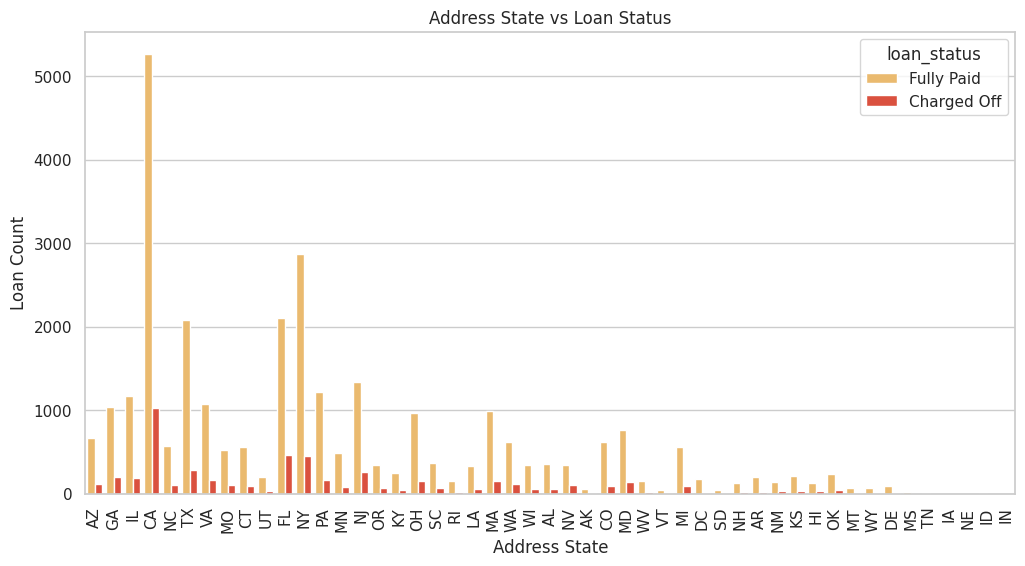

In [188]:
countplot_graph({
    'data': df,
    'x': 'addr_state',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Address State',
    'ylabel': 'Loan Count',
    'title': 'Address State vs Loan Status',
    'palette': "YlOrRd",
    'x_tick_rotation': 90
}, annot=False)

Loan applicants from the state of California (CA), Florida (FL), and New York (NY) are most likely to default


**Bivariate Analysis of Quantitative Variables**

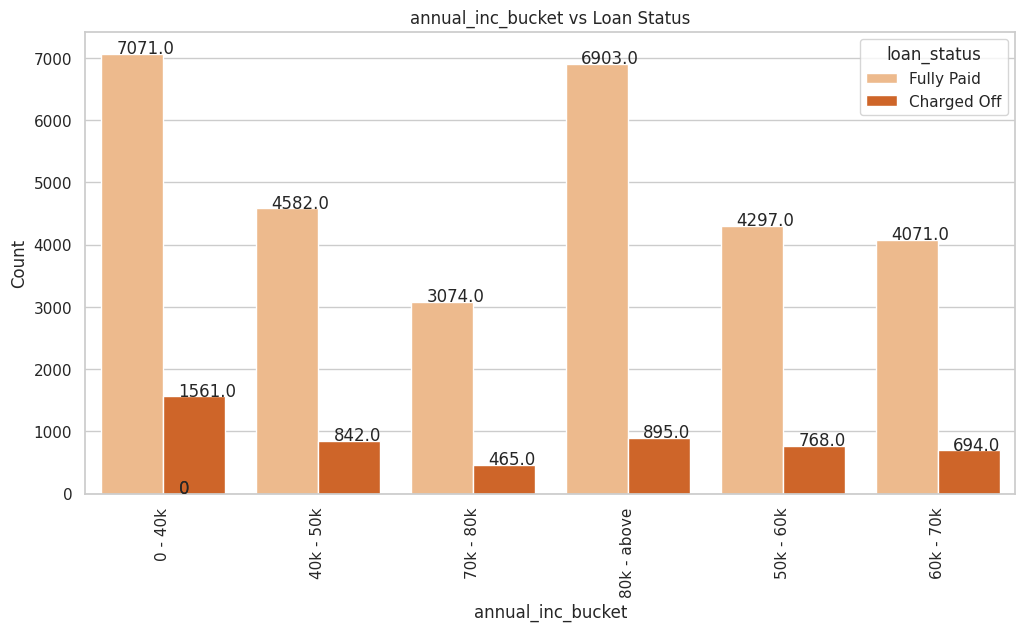

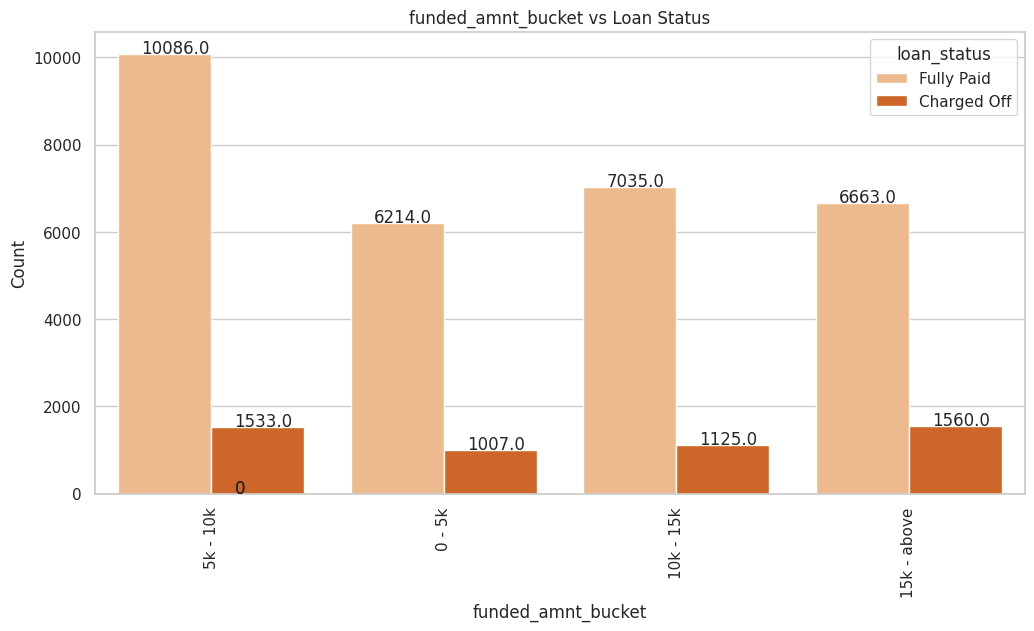

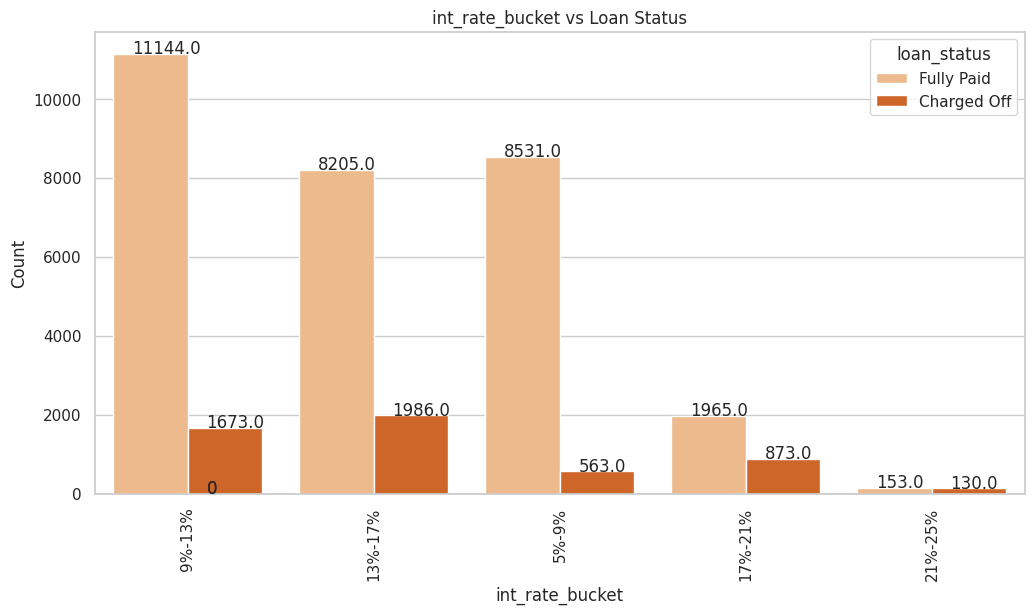

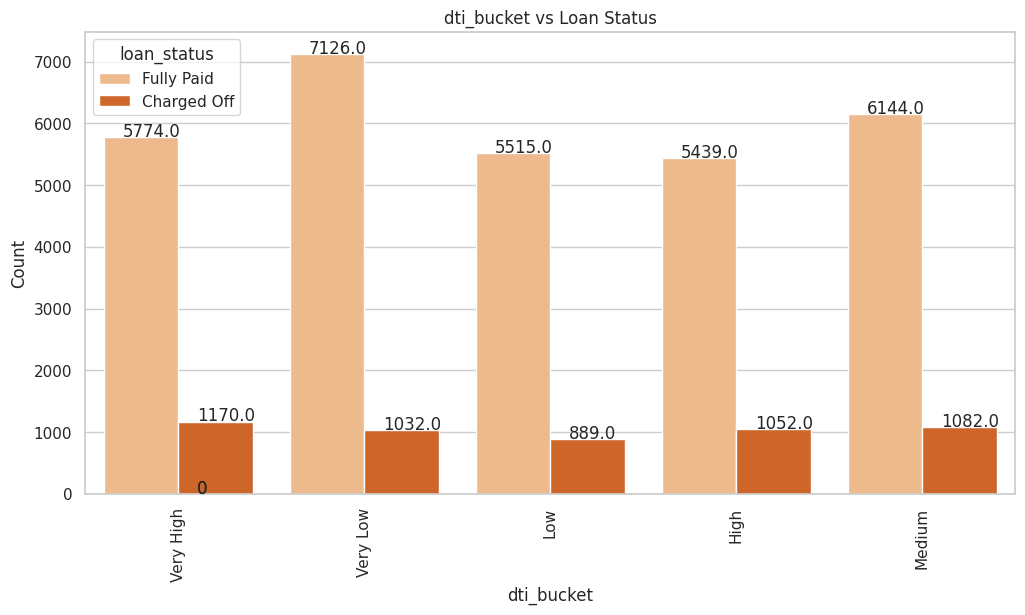

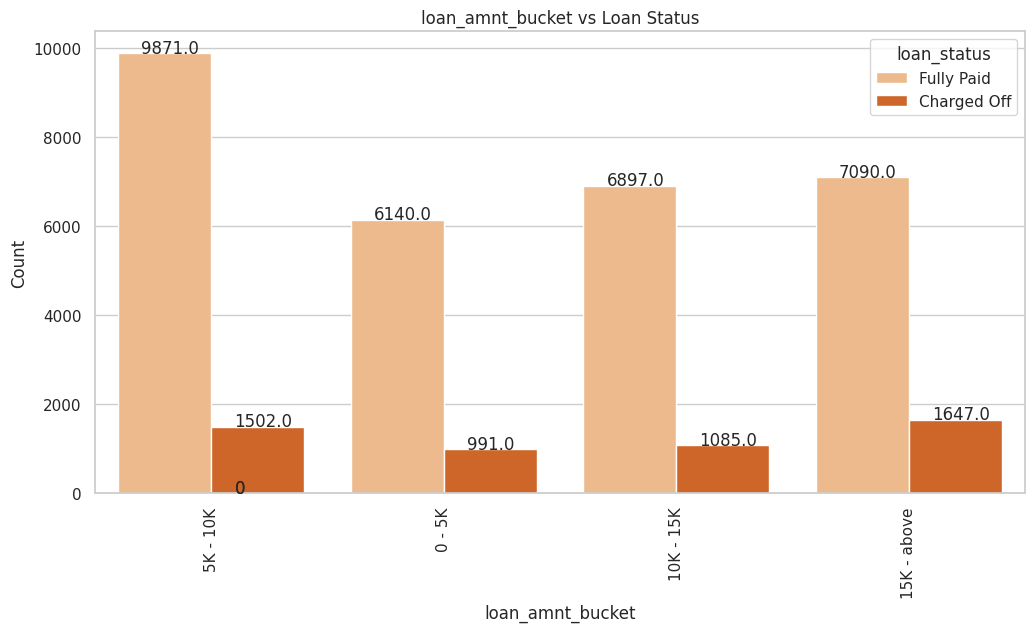

In [189]:
for col in ['annual_inc_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket']:
    countplot_graph({
    'data': df,
    'x': col,
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': col,
    'ylabel': 'Count',
    'title': f'{col} vs Loan Status',
    'palette': "Oranges",
    'x_tick_rotation': 90
}, annot=True)

# **Observations from Bivariate Analysis of Quantitative Variables**


*   A majority of the loan applicants who defaulted received loan amounts of $15,000 or higher.

*   The majority of loan applicants who charged off had significantly high Debt-to-Income (DTI) ratios.

*   A significant portion of loan applicants who defaulted received loans with interest rates falling within the range of 13% to 17%.

*   A majority of the loan applicants who charged off reported an annual income of less than $40,000.

**Summary of Bivariate Analysis**

*   The loan applicants belonging to Grades B, C, and D contribute to most of the "Charged Off" loans.
*   Loan applicants belonging to Sub Grades B3, B4, and B5 are more likely to charge off.
*   Loan applicants applying for loans with a 60-month term are more likely to default than those taking loans for 36 months.
*   Most loan applicants have ten or more years of experience, and they are also the most likely to default.
*   Most loan applicants have ten or more years of experience, and they are also the most likely to default.
*   The number of loan applicants has steadily increased from 2007 to 2011, indicating a positive trend in the upcoming years.
*   December is the most preferred month for taking loans, possibly due to the holiday season.
*   The fourth quarter (Q4) is the most preferred quarter for taking loans, primarily because of the upcoming holiday season.
*   Debt consolidation is the category where the maximum number of loans are issued, and people have defaulted the most in the same category.
*   Loan applicants who live in rented or mortgaged houses are more likely to default.
*   Verified loan applicants are defaulting more than those who are not verified.
*   Loan applicants from the states of California (CA), Florida (FL), and New York (NY) are most likely to default.
*   A majority of the loan applicants who defaulted received loan amounts of 15,000 USD or higher.
*   The majority of loan applicants who charged off had significantly high Debt-to-Income (DTI) ratios.
*   A significant portion of loan applicants who defaulted received loans with interest rates falling within the range of 13% to 17%.
*   A majority of the loan applicants who charged off reported an annual income of less than $40,000.

**Inferences of Bivariate Analysis**

- **Risk Assessment for Grades B, C, and D**:
  - Since loan applicants from Grades B, C, and D contribute to most of the "Charged Off" loans, the company should consider implementing stricter risk assessment and underwriting criteria for applicants falling into these grades.

- **Subgrades B3, B4, and B5**:
  - Pay special attention to applicants with Subgrades B3, B4, and B5, as they are more likely to charge off. Implementing additional risk mitigation measures or offering them lower loan amounts could be considered.

- **Term Length**:
  - Given that applicants opting for 60-month loans are more likely to default, the company should consider evaluating the risk associated with longer-term loans and potentially limiting the maximum term or adjusting interest rates accordingly.

- **Experience and Default Probability**:
  - Loan applicants with ten or more years of experience are more likely to default. This suggests that experience alone may not be a reliable indicator of creditworthiness. The company should use a more comprehensive credit scoring system that factors in other risk-related attributes.

- **Positive Growth Trend**:
  - The steady increase in the number of loan applicants from 2007 to 2011 indicates growth in the market. The company can capitalize on this trend by maintaining a competitive edge in the industry while keeping risk management practices robust.

- **Seasonal Trends**:
  - December and Q4 are peak periods for loan applications, likely due to the holiday season. The company should anticipate increased demand during these periods and ensure efficient processing to meet customer needs.

- **Debt Consolidation Risk**:
  - Since debt consolidation is the category with the maximum number of loans and high default rates, the company should carefully evaluate applicants seeking debt consolidation loans and potentially adjust interest rates or offer financial counseling services.

- **Housing Status and Default Risk**:
  - Applicants living in rented or mortgaged houses are more likely to default. This information can be considered in the underwriting process to assess housing stability and its impact on repayment ability.

- **Verification Process**:
  - Verified loan applicants are defaulting more than those who are not verified. The company should review its verification process to ensure it effectively assesses applicant creditworthiness and consider improvements or adjustments.

- **Geographic Risk**:
  - Loan applicants from states like California (CA), Florida (FL), and New York (NY) are more likely to default. The company should monitor regional risk trends and adjust lending strategies or rates accordingly in these areas.

- **High Loan Amounts**:
  - Applicants receiving loan amounts of $15,000 or higher are more likely to default. The company can mitigate this risk by conducting more thorough assessments for larger loan requests and potentially capping loan amounts for higher-risk applicants.

- **DTI and Interest Rates**:
  - High Debt-to-Income (DTI) ratios and interest rates in the 13%-17% range are associated with defaults. The company should review its interest rate determination process and consider adjusting rates based on DTI ratios to better align with the borrower's ability to repay.

- **Low Annual Income**:
  - Applicants with annual incomes less than $40,000 have a higher likelihood of defaulting. The company should consider offering financial education resources or setting maximum loan amounts based on income levels to ensure affordability for borrowers.
















# Correlation Analysis

In [207]:
correlation_df = df.copy()
# Dropping columns which are irrelevant to analysis
non_object_columns = [col for col in correlation_df.columns if correlation_df[col].dtype == 'object']
correlation_df = correlation_df.drop(non_object_columns, axis = 1)

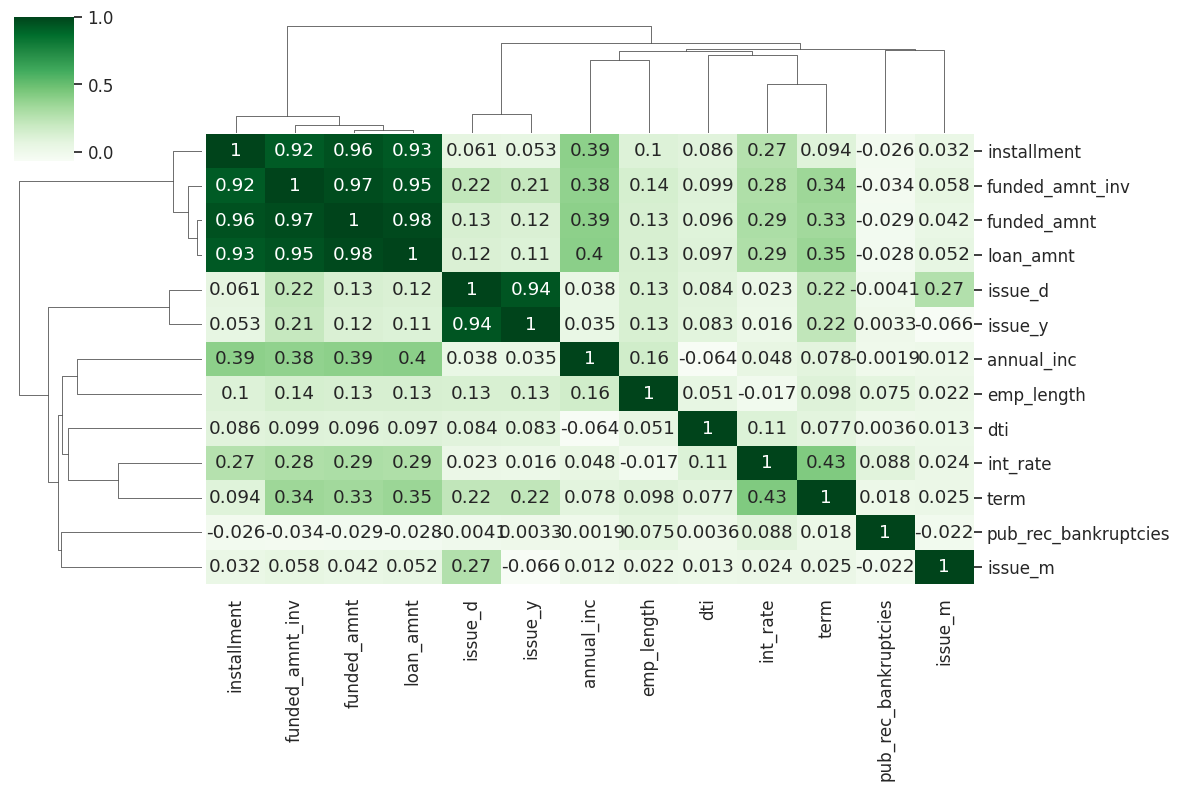

In [208]:
corr = correlation_df.corr()
sns.set(font_scale=1.1)

sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Greens")
plt.show()

 ## **Inferences from Correlation Metrics**

## Strong Correlation
- **Installment**:
  - Strong correlation with `funded_amnt`, `loan_amnt`, and `funded_amnt_inv`.
  
- **Term**:
  - Strong correlation with `interest_rate`.
  
- **Annual Income**:
  - Strong correlation with `loan_amount`.

## Weak Correlation
- **DTI (Debt-to-Income Ratio)**:
  - Weak correlation with most of the fields.
  
- **Employment Length**:
  - Weak correlation with most of the fields.

## Negative Correlation
- **Public Record Bankruptcies**:
  - Negative correlation with almost every field.
  
- **Annual Income**:
  - Negative correlation with DTI (Debt-to-Income Ratio).


# Multivariate Analysis

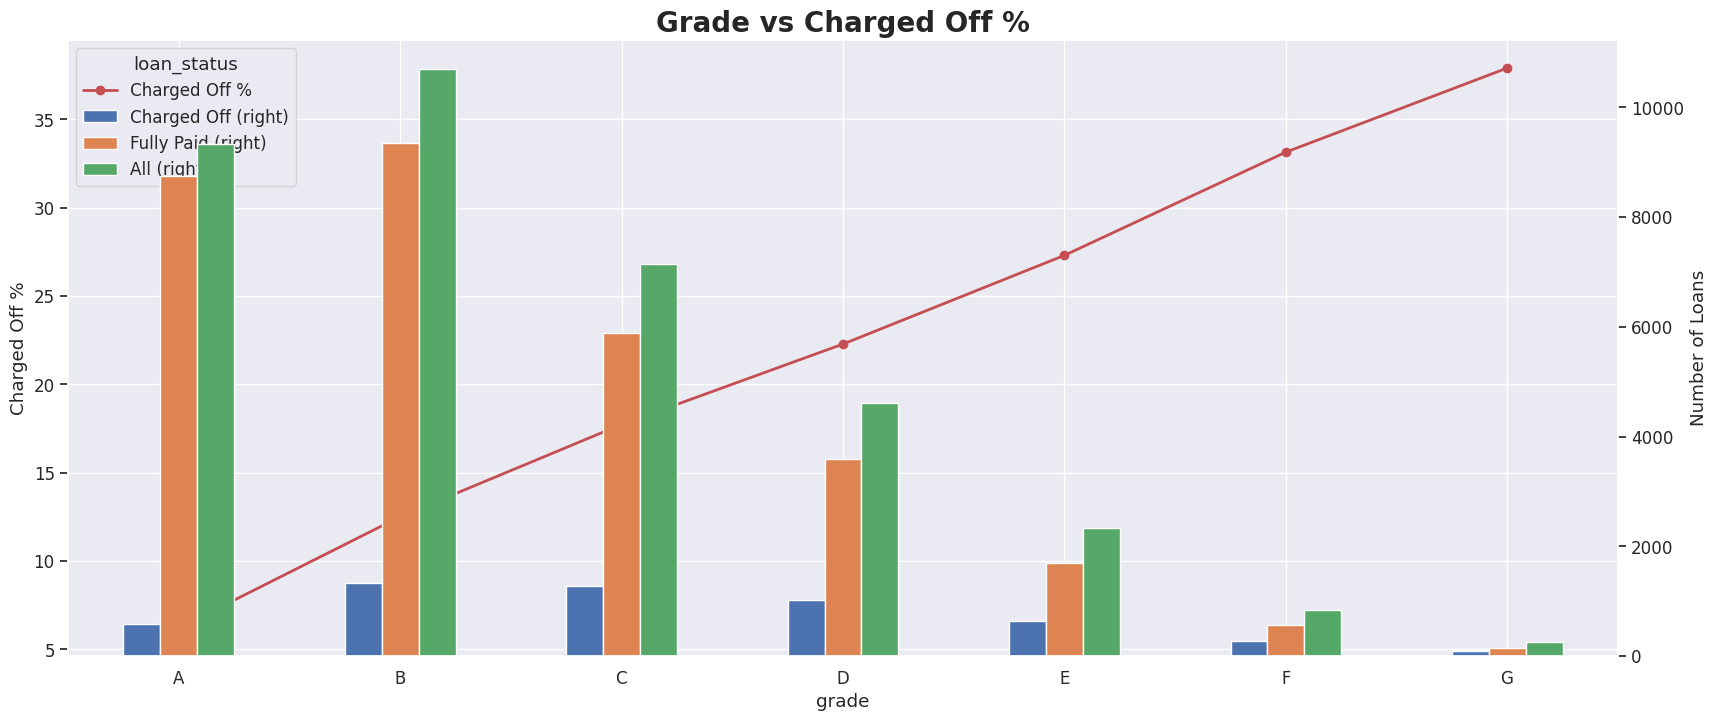

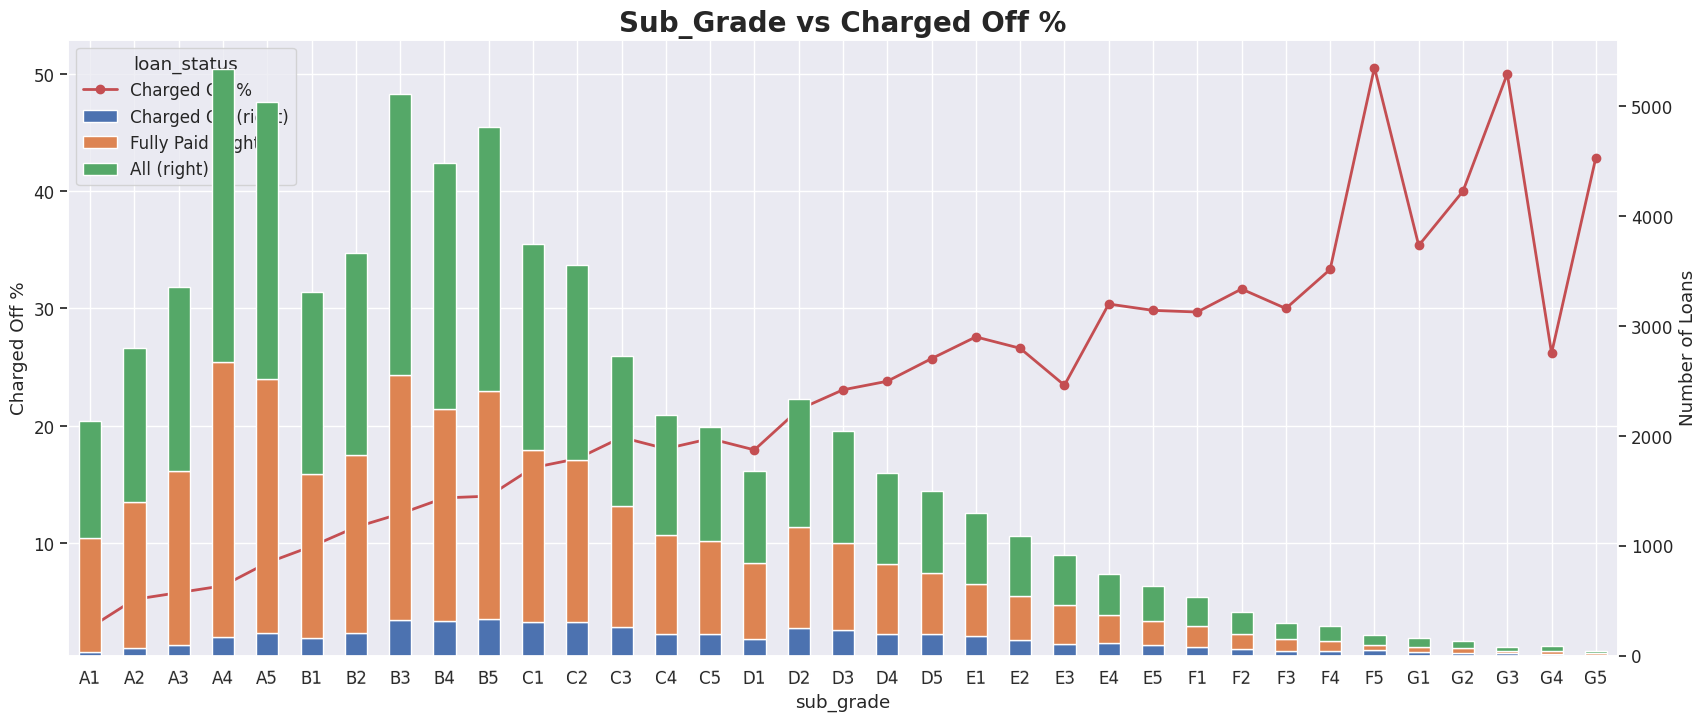

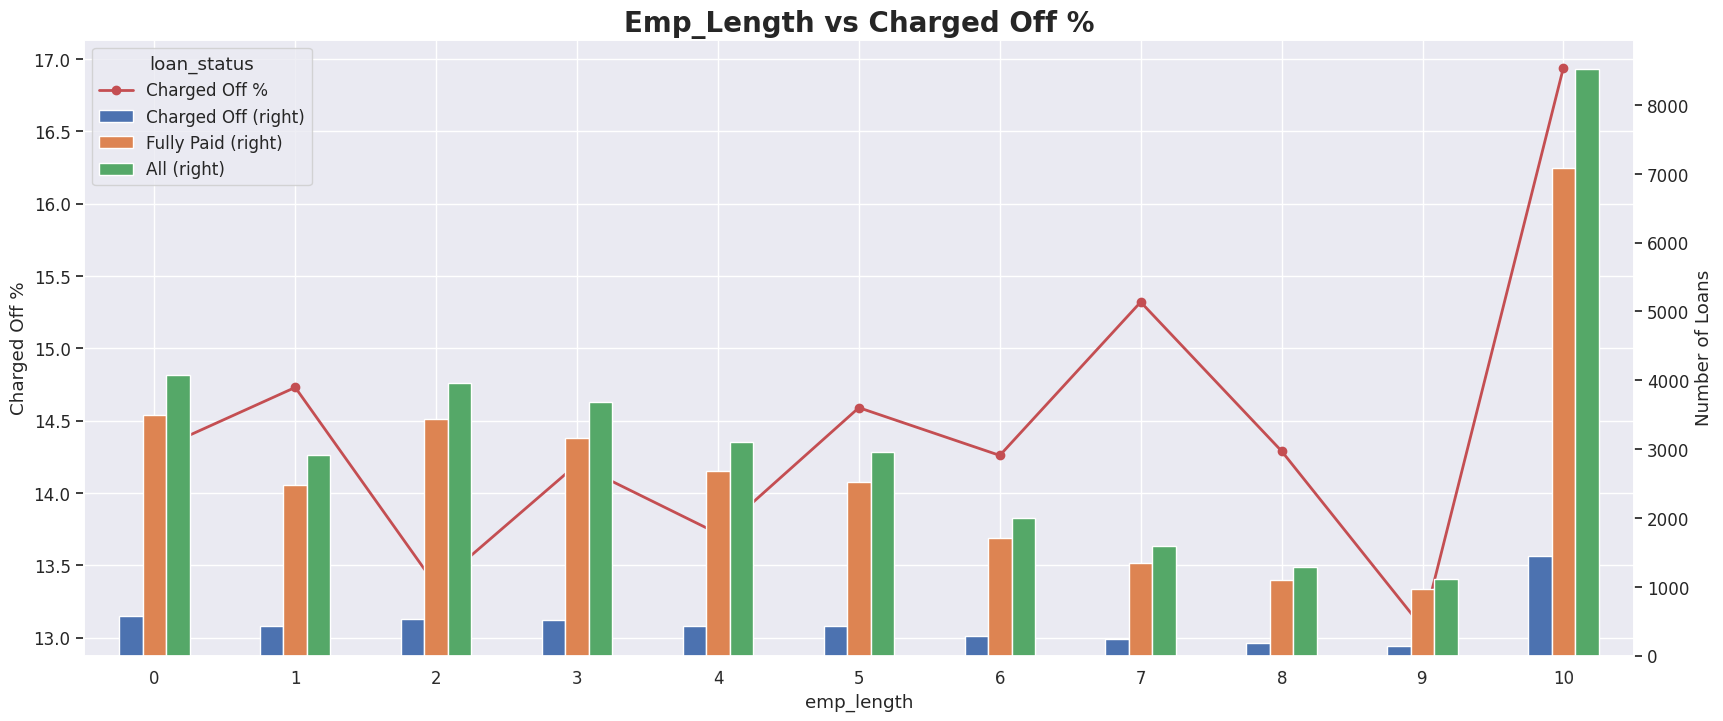

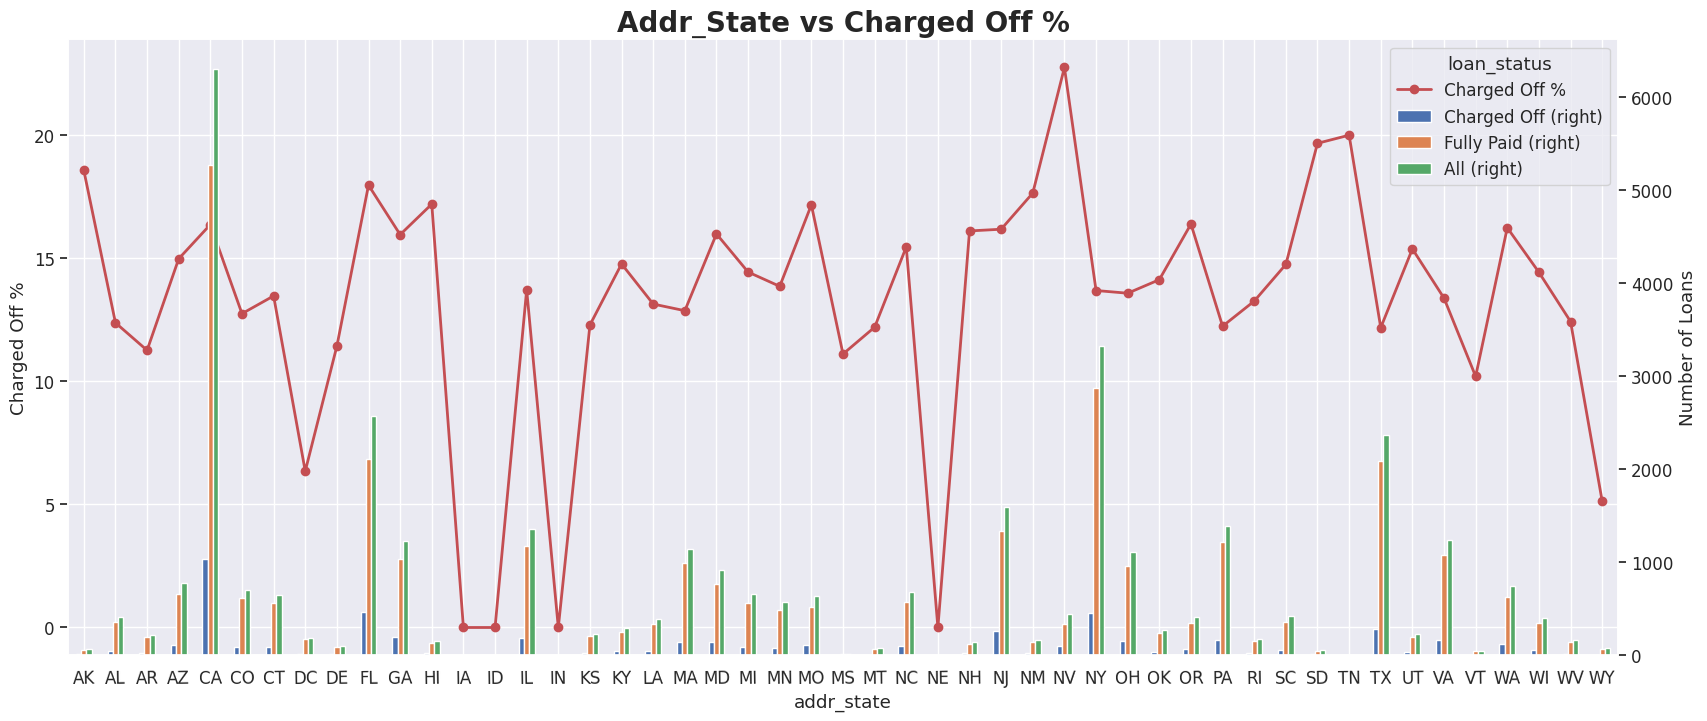

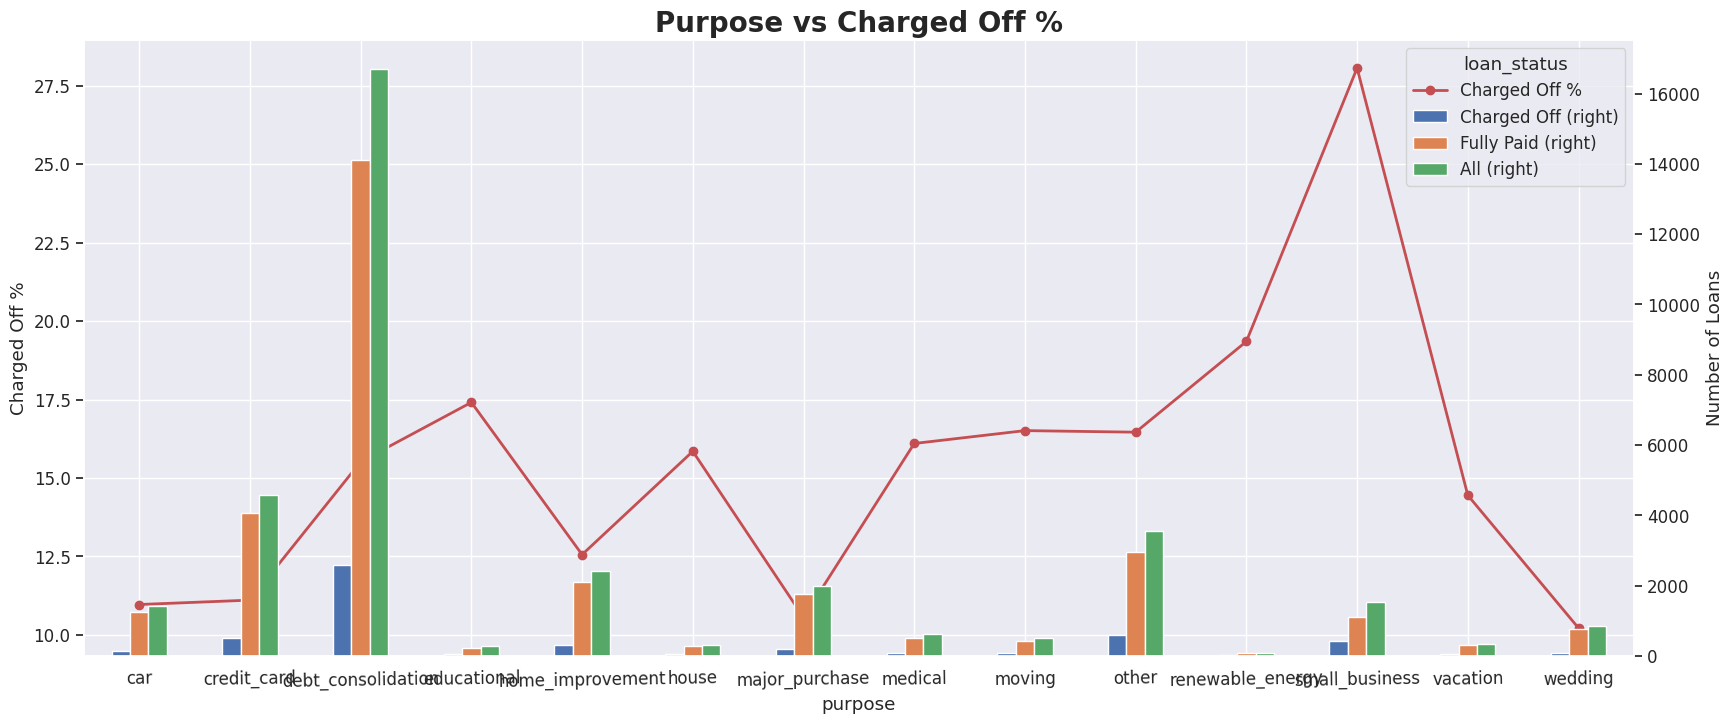

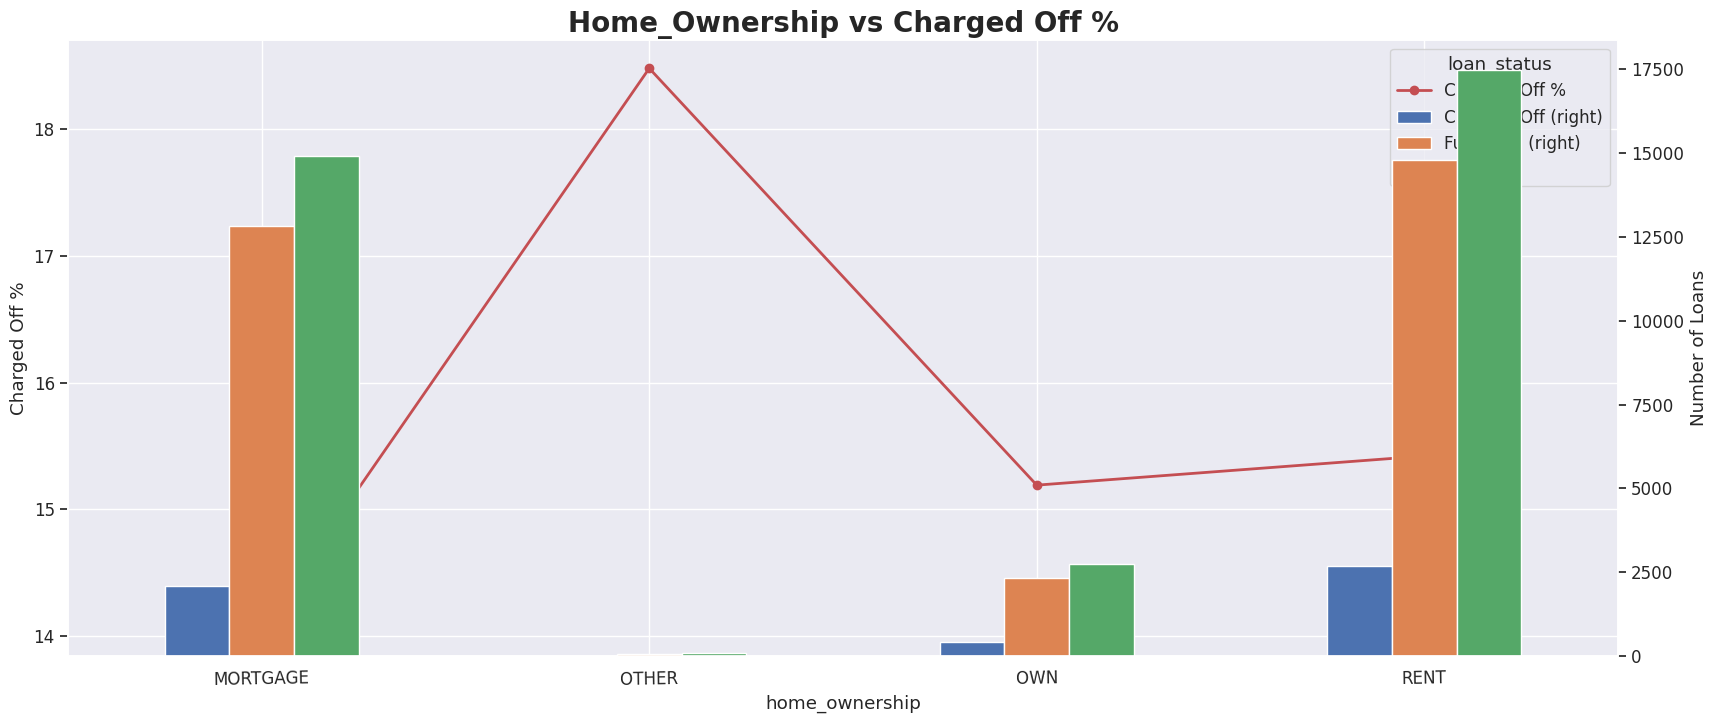

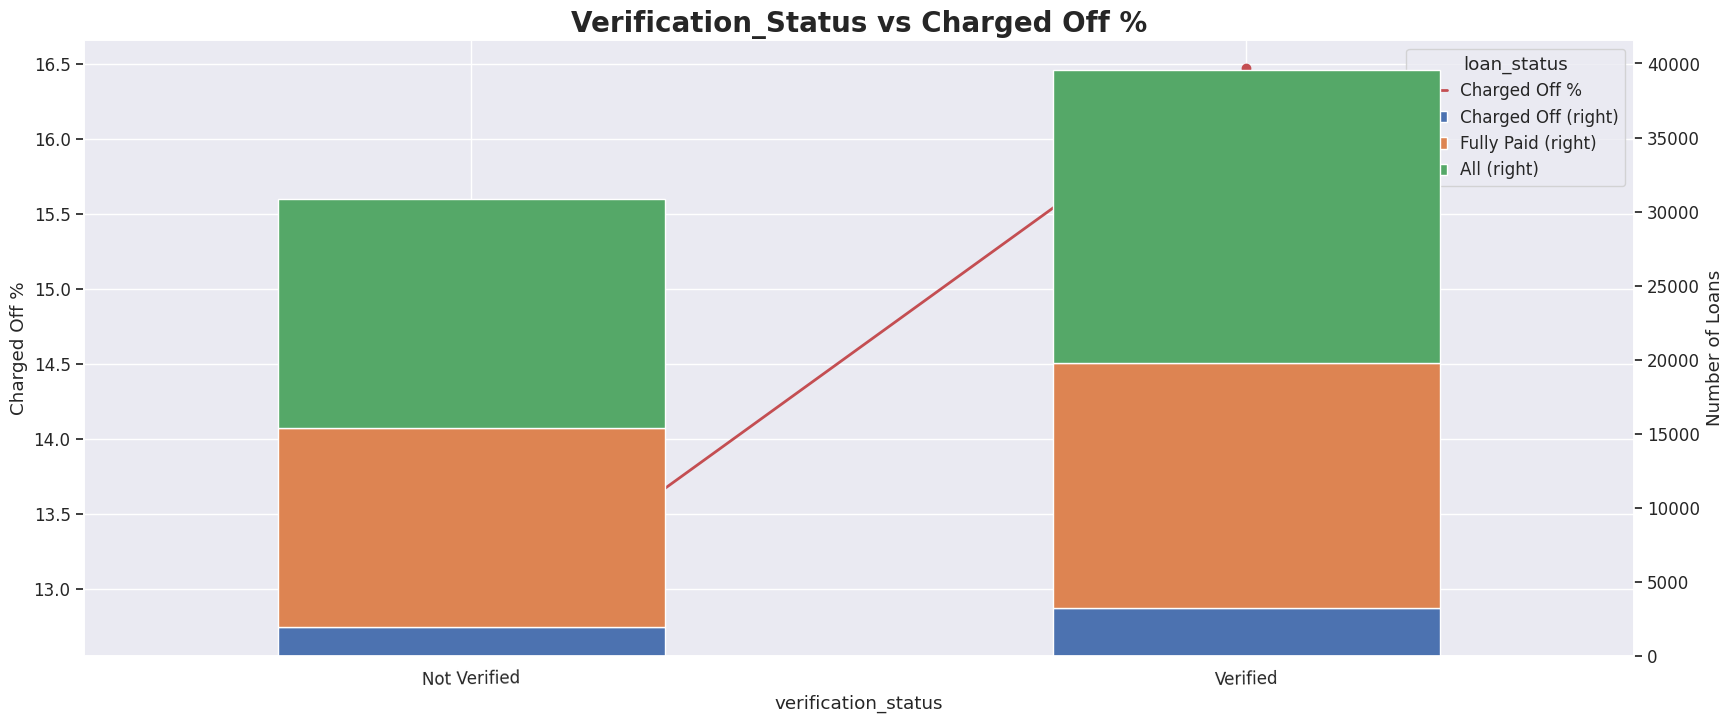

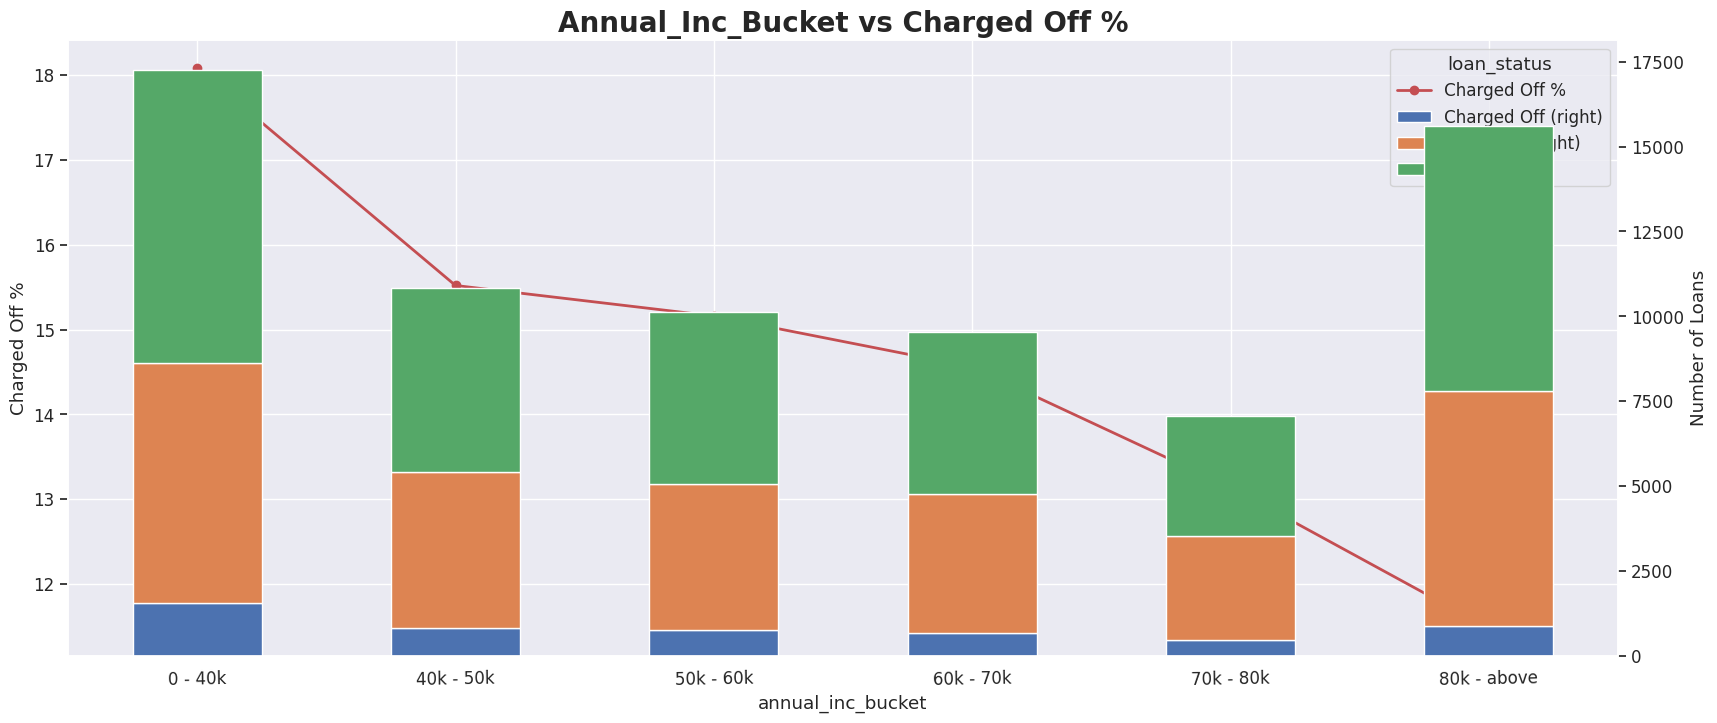

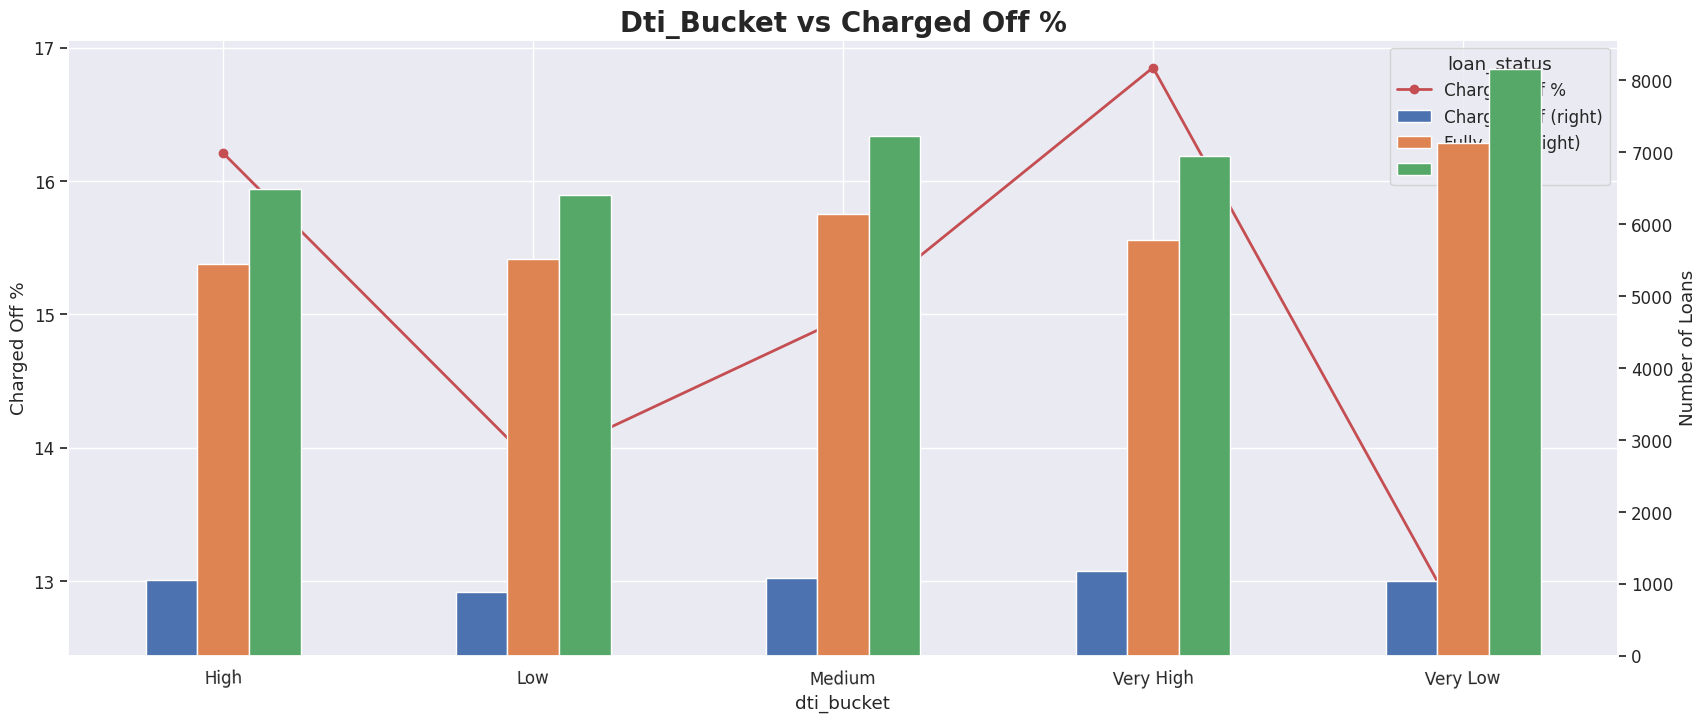

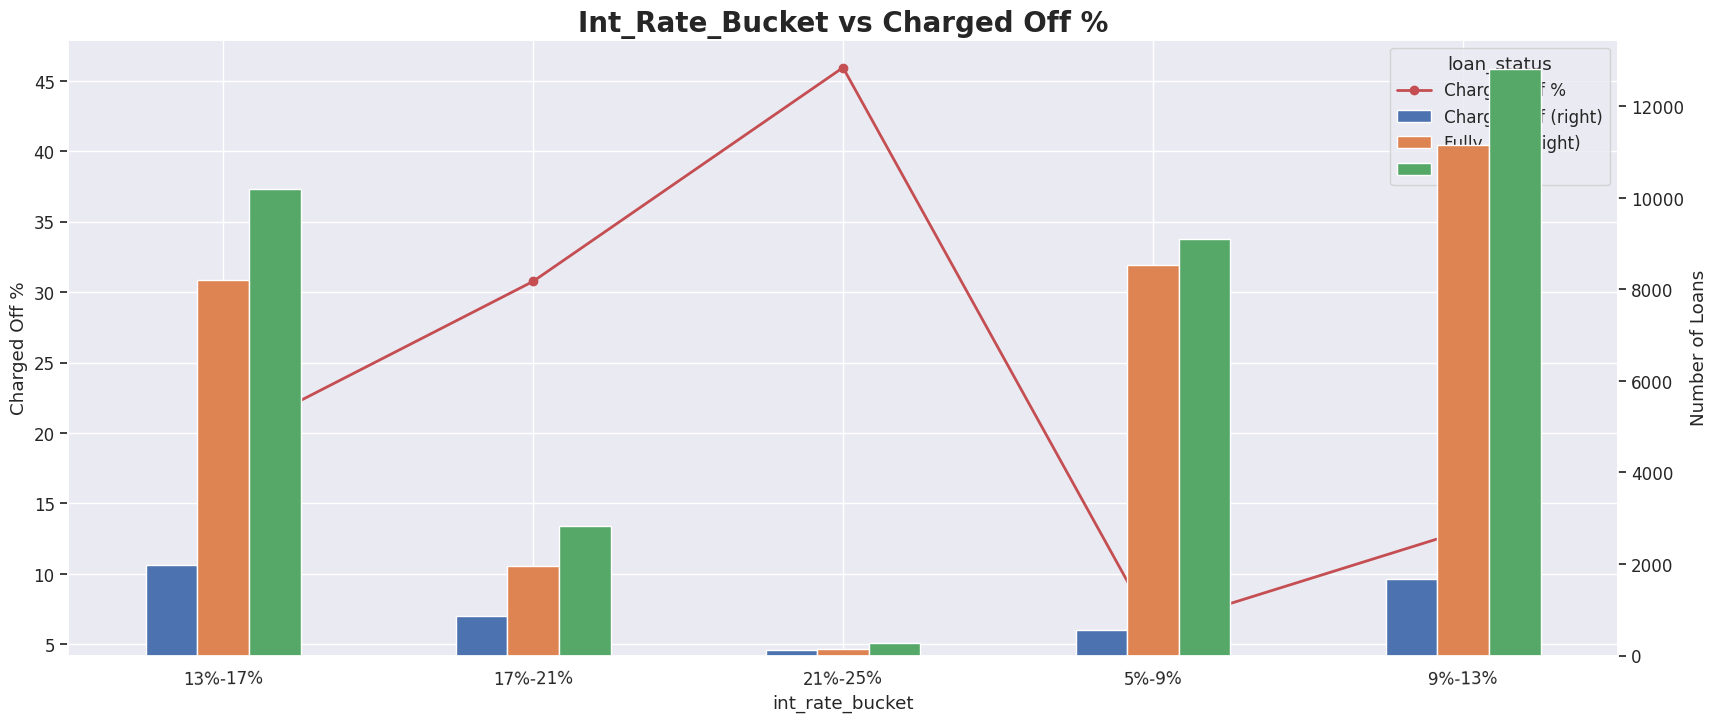

In [210]:
columns_config = {
    'grade': {},
    'sub_grade': {'stacked': True},
    'emp_length': {},
    'addr_state': {},
    'purpose': {},
    'home_ownership': {},
    'verification_status': {'stacked': True},
    'annual_inc_bucket': {'stacked': True},
    'dti_bucket': {},
    'int_rate_bucket': {}
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    plot_charged_off_percentage(df, column, stacked)

# Summary of Multivariate Analysis

- **Tendency to Default**:
  - The likelihood of defaulting on a loan is higher among applicants belonging to grades **B, C, and D**.
  
- **Subgrades**:
  - Borrowers from subgrades **B3, B4, and B5** exhibit the highest tendency to default.
  
- **Experience**:
  - Loan applicants with **10 years of experience** show the maximum tendency to default on loans.
  
- **Geographic Risk**:
  - Borrowers from the states **California (CA)**, **Florida (FL)**, and **New Jersey (NJ)** have the highest tendency to default.
  
- **Housing Status**:
  - Borrowers living in **rented houses** demonstrate the greatest likelihood of defaulting on loans.
  
- **Income Levels**:
  - Borrowers in lower income groups have the highest tendency to default, which generally decreases with an increase in annual income.
  
- **Interest Rates**:
  - The tendency to default on loans increases with higher interest rates.
